# Description

Daily weather observations from multiple locations around Australia, obtained from the Australian Commonwealth Bureau of Meteorology and processed to create this realtively large sample dataset for illustrating analytics, data mining, and data science using R and Rattle.

The data has been processed to provide a target variable RainTomorrow (whether there is rain on the following day - No/Yes) and a risk variable RISK_MM (how much rain recorded in millimeters). Various transformations are performed on the data.

The weatherAUS dataset is regularly updated an updates of this package usually correspond to updates to this dataset. The data is updated from the Bureau of Meteorology web site.

The locationsAUS dataset records the location of each weather station.

The source dataset comes from the Australian Commonwealth Bureau of Meteorology. The Bureau provided permission to use the data with the Bureau of Meteorology acknowledged as the source of the data, as per email from Cathy Toby (C.Toby@bom.gov.au) of the Climate Information Services of the National CLimate Centre, 17 Dec 2008.

A CSV version of this dataset is available as https://rattle.togaware.com/weatherAUS.csv.

The weatherAUS dataset is a data frame containing over 140,000 daily observations from over 45 Australian weather stations.

Date : The date of observation (a Date object).

Location : The common name of the location of the weather station.

MinTemp : The minimum temperature in degrees celsius.

MaxTemp : The maximum temperature in degrees celsius.

Rainfall : The amount of rainfall recorded for the day in mm.

Evaporation : The so-called Class A pan evaporation (mm) in the 24 hours to 9am.

Sunshine : The number of hours of bright sunshine in the day.

WindGustDir : The direction of the strongest wind gust in the 24 hours to midnight.

WindGustSpeed : The speed (km/h) of the strongest wind gust in the 24 hours to midnight.

Temp9am : Temperature (degrees C) at 9am.

Humidity9am : Relative humidity (percent) at 9am.

Cloud9am  : Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

WindSpeed9am : Wind speed (km/hr) averaged over 10 minutes prior to 9am.

Pressure9am : Atmospheric pressure (hpa) reduced to mean sea level at 9am.

Temp3pm : Temperature (degrees C) at 3pm.

Humidity3pm : Relative humidity (percent) at 3pm.

Cloud3pm : Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values.

WindSpeed3pm  : Wind speed (km/hr) averaged over 10 minutes prior to 3pm.

Pressure3pm : Atmospheric pressure (hpa) reduced to mean sea level at 3pm.

RainToday : Integer: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0.

RISK_MM : The amount of rain. A kind of measure of the "risk".

RainTomorrow : The target variable. Did it rain tomorrow?

In [108]:
data['MinTemp'].describe()

count    130657.000000
mean         12.131222
std           6.317727
min          -6.200000
25%           7.600000
50%          12.000000
75%          16.700000
max          30.200000
Name: MinTemp, dtype: float64

In [1]:
#Importing Libraries
#Basic libraries
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from datetime import date
from scipy import stats

#Fetaure Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Imbalance Dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#Model Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, f1_score,auc,roc_curve,roc_auc_score, precision_recall_curve
import scikitplot as skplt

#Modelling Algoritm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Deployment
import pickle

In [2]:
# Load Dataset
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
#Melihat info dari data yang kita punya seperti jumlah kolom, input, memori, tipe data dll
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
#Melihat apakah ada kolom yang inputnya kosong
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

# 2. Data Pre-Proccessing


Pada tahapa ini, kita akan menyiapkan data sebelum dilakukan pemodelan. Di sini, data akan kita bersihkan dari input-input yang salah, input yang kosong, penyesuaian tipe data, normalisasi data, menghilangkan outliers, exploratory data analysis, melakukan feature engineering, dan feature selcetion, scaling, serta menangani imbalance dataset.

## 2.1 Handling Variable

Pada bagian ini, kita akan melakukan penyesuain tipe data tiap kolom, inputnya sebelum nanti kita tangani input yang kosong. Pada bagian ini kita juga membuat dan mengganti beberapa varibel untuk mempermudah model dalam memprediksi.

In [5]:
# Kita akan merubah variable 'date' yang memiliki tanggal menjadi tipe date/tanggal
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = pd.to_datetime(data['Date'],format='%y-%m-%d').dt.strftime('%d-%m-%y')
data['Date']

0         01-12-08
1         02-12-08
2         03-12-08
3         04-12-08
4         05-12-08
            ...   
142188    20-06-17
142189    21-06-17
142190    22-06-17
142191    23-06-17
142192    24-06-17
Name: Date, Length: 142193, dtype: object

In [6]:
# Merupah input WindGustDir dari string menjadi integer 
data['WindGustDir'] = data['WindGustDir'].replace({'N':0,'NNE':1,'NE':2,'ENE':3,'E':4,'ESE':5,'SE':6,'SSE':7,'S':8,
                                                   'SSW':9,'SW':10,'WSW':11,'W':12,'WNW':13,'NW':14,'NNW':15})

count    132863.000000
mean          7.555008
std           4.482629
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          15.000000
Name: WindGustDir, dtype: float64


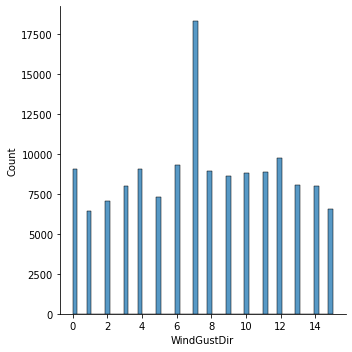

In [7]:
# Melakukan analisis terhadap variable WindGustDir dan mengisi NA value menjadi mean nya
print(data['WindGustDir'].describe())
data['WindGustDir'] = data['WindGustDir'].fillna(7.555008).astype(int)
sns.displot(data,x='WindGustDir')

In [8]:
# Merupah input WindDir9am dari string menjadi integer 
data['WindDir9am'] = data['WindDir9am'].replace({'N':0,'NNE':1,'NE':2,'ENE':3,'E':4,'ESE':5,'SE':6,'SSE':7,'S':8,
                                                   'SSW':9,'SW':10,'WSW':11,'W':12,'WNW':13,'NW':14,'NNW':15})


count    132180.000000
mean          7.265971
std           4.664407
min           0.000000
25%           3.000000
50%           7.000000
75%          11.000000
max          15.000000
Name: WindDir9am, dtype: float64


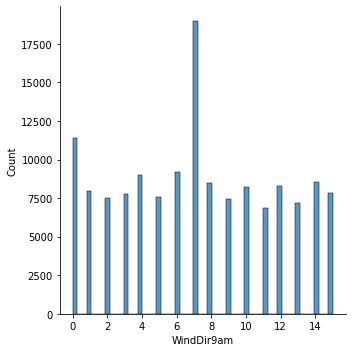

In [9]:
# Melakukan Analisis terhadap variabel WindDir9am dan mengisi NA value menjadi mean nya
print(data['WindDir9am'].describe())
data['WindDir9am'] = data['WindDir9am'].fillna(7.265971).astype(int)
sns.displot(data,x='WindDir9am')

In [10]:
# Merubah input WindDir3pm dari string menjadi integer 
data['WindDir3pm'] = data['WindDir3pm'].replace({'N':0,'NNE':1,'NE':2,'ENE':3,'E':4,'ESE':5,'SE':6,'SSE':7,'S':8,
                                                   'SSW':9,'SW':10,'WSW':11,'W':12,'WNW':13,'NW':14,'NNW':15})


count    138415.000000
mean          7.647394
std           4.488344
min           0.000000
25%           4.000000
50%           8.000000
75%          12.000000
max          15.000000
Name: WindDir3pm, dtype: float64


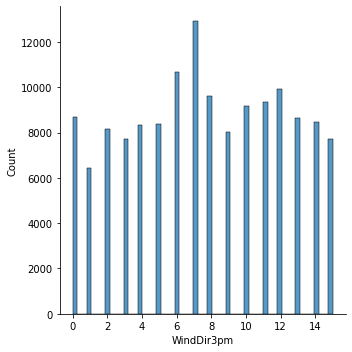

In [11]:
# Melakukan Analisis variabel WindDir3pm dan mengisi NA value menjadi mean nya
print(data['WindDir3pm'].describe())
data['WindDir3pm'] = data['WindDir3pm'].fillna(7.647394).astype(int)
sns.displot(data,x='WindDir3pm')

In [12]:
# Merubah input RainToday dari string menjadi integer 
data['RainToday'] = data['RainToday'].replace({'No':0, 'Yes':1})

count    140787.000000
mean          0.223423
std           0.416541
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RainToday, dtype: float64


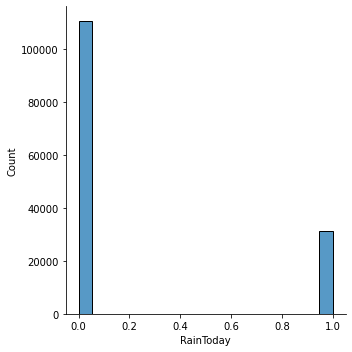

In [13]:
# Melakukan Analisis variabel RainToday dan mengisi NA value menjadi mean nya
print(data['RainToday'].describe())
data['RainToday'] = data['RainToday'].fillna(0.223423).astype(int)
sns.displot(data,x='RainToday')

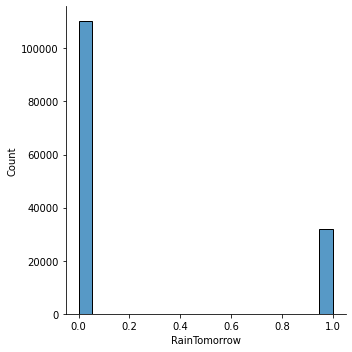

In [14]:
# Merubah input RainTomorrow dari string menjadi integer
data['RainTomorrow'] = data['RainTomorrow'].replace({'No':0, 'Yes':1}).astype(int)
sns.displot(data,x='RainTomorrow')

count    141556.000000
mean         12.186400
std           6.403283
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64


Text(0.5, 1.0, 'MinTemp Distribution')

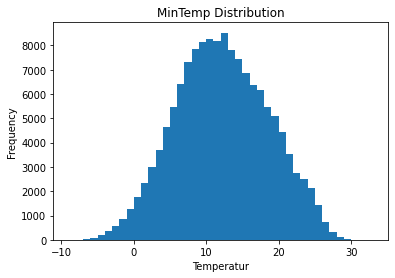

In [15]:
# Merubah nan value pada MinTemp dengan rata - rata dari variable tersebut
print(data['MinTemp'].describe())
data['MinTemp'] = data['MinTemp'].fillna(12.186400).astype(float)
bin_list = list(range(-9,34,1))
 plt.hist(data['MinTemp'], bins= bin_list)
plt.xlabel('Temperatur')
plt.ylabel('Frequency')
plt.title('MinTemp Distribution')

count    141871.000000
mean         23.226784
std           7.117618
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64


Text(0.5, 1.0, 'MaxTemp Distribution')

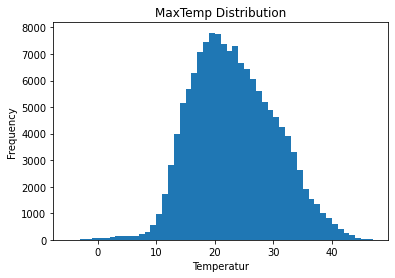

In [16]:
# Merubah nan value pada MaxTemp dengan rata - rata dari variable tersebut
print(data['MaxTemp'].describe())
data['MaxTemp'] = data['MaxTemp'].fillna(23.226784).astype(float)
bin_list = list(range(-5,48,1))
plt.hist(data['MaxTemp'], bins= bin_list)
plt.xlabel('Temperatur')
plt.ylabel('Frequency')
plt.title('MaxTemp Distribution')

In [17]:
# Untuk variabel Rainfall harus dicek terlebih dahulu menggunakan fungsi describe
data['Rainfall'].describe()

count    140787.000000
mean          2.349974
std           8.465173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

Dapat dilihat bahwa lebih dari 50% value pada variabel Rainfall bernilai 0, menunjukan sedikitnya jumlah hujan disana setiap hari dan hampir diseluruh lokasi penelitian. oleh karena itu kita akan mengganti nilai nan dengan 0 karena hampir 75% data benilai 0.

In [18]:
# Untuk variabel Rainfall, nilai nan diubah menjadi 0
data['Rainfall'] = data['Rainfall'].fillna(0).astype(float)

Text(0.5, 1.0, 'Rainfall vs Evaporation')

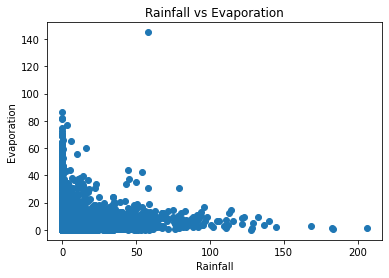

In [19]:
# Untuk variabel Evaporation nan value berjumlah 60843, oleh karena itu kita harus bijak dalam handling null values tersebut
# kita akan mengecek apakah variable Evaporation memiliki hubungan positif dengan Rainfall
plt.scatter(data['Rainfall'],data['Evaporation'])
plt.xlabel('Rainfall')
plt.ylabel('Evaporation')
plt.title('Rainfall vs Evaporation')

In [20]:
print('Pearson Correlation : ', data['Rainfall'].corr(data['Evaporation']))
print('Spearman Correlation : ', data['Rainfall'].corr(data['Evaporation'],method='spearman'))
print('Kendall Correlation : ', data['Rainfall'].corr(data['Evaporation'],method='kendall'))

Pearson Correlation :  -0.06424819283070028
Spearman Correlation :  -0.30867038146293746
Kendall Correlation :  -0.23392436530231178


Dari grafik tersebut dapat terlihat bahwa value Evaporation dan Rainfall memiliki korelasi negatif atau tidak signifikan.

In [21]:
# karena tidak memiliki hubungan atau tidak signifikan maka null values pada variabel Evaporation akan diganti menjadi nilai mean nya.
print(data['Evaporation'].describe())
data['Evaporation'] = data['Evaporation'].fillna(5.469824).astype(float)

count    81350.000000
mean         5.469824
std          4.188537
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64


count    74377.000000
mean         7.624853
std          3.781525
min          0.000000
25%          4.900000
50%          8.500000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64


Text(0.5, 1.0, 'Sunshine (Hours) Distribution')

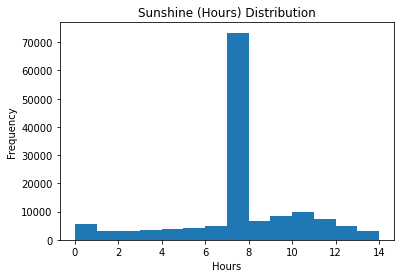

In [22]:
# Merubah nan value pada variabel Sunshine menjadi meannya
print(data['Sunshine'].describe())
data['Sunshine'] = data['Sunshine'].fillna(7.624853).astype(float)
plt.hist(data['Sunshine'],bins=list(range(0,15,1)))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Sunshine (Hours) Distribution')

count    132923.000000
mean         39.984292
std          13.588801
min           6.000000
25%          31.000000
50%          39.000000
75%          48.000000
max         135.000000
Name: WindGustSpeed, dtype: float64


Text(0.5, 1.0, 'WindGustSpeed Distribution')

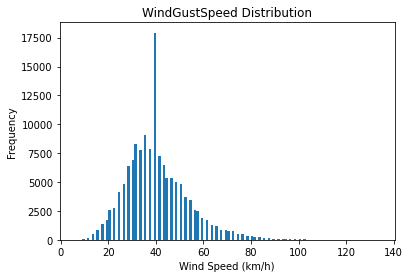

In [23]:
# Merubah nan value pada variabel WindGustSpeed menjadi nilai meannya.
print(data['WindGustSpeed'].describe())
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(39.984292).astype(float)
plt.hist(data['WindGustSpeed'],bins=list(range(6,135,1)))
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('WindGustSpeed Distribution')

count    140845.000000
mean         14.001988
std           8.893337
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max         130.000000
Name: WindSpeed9am, dtype: float64


Text(0.5, 1.0, 'WindSpeed9am Distribution')

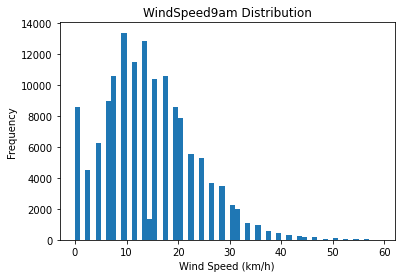

In [24]:
# Handling variable WindSpeed9am dengan mengganti null values menjadi mean 
print(data['WindSpeed9am'].describe())
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(14.001988).astype(float)
bin_list = list(range(0,60,1))
plt.hist(data['WindSpeed9am'],bins=bin_list)
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('WindSpeed9am Distribution')

count    139563.000000
mean         18.637576
std           8.803345
min           0.000000
25%          13.000000
50%          19.000000
75%          24.000000
max          87.000000
Name: WindSpeed3pm, dtype: float64


Text(0.5, 1.0, 'WindSpeed3pm Distribution')

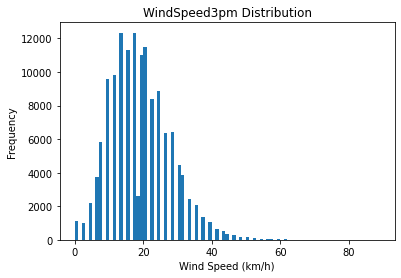

In [25]:
# Handling variabel WindSpeed3pm dan mengganti null values dengan nilai mean
print(data['WindSpeed3pm'].describe())
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(18.637576).astype(float)
plt.hist(data['WindSpeed3pm'], bins=list(range(0,90,1)))
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('WindSpeed3pm Distribution')

count    140419.000000
mean         68.843810
std          19.051293
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64


Text(0.5, 1.0, 'Humidity9am Distribution')

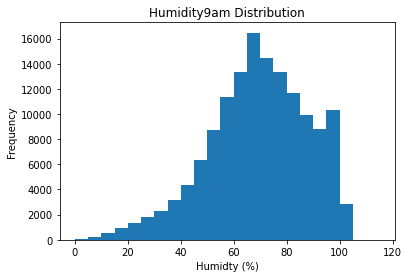

In [26]:
# Handling variabel Humidity9am dan mengganti null values dengan nilai mean
print(data['Humidity9am'].describe())
data['Humidity9am'] = data['Humidity9am'].fillna(68.843810).astype(float)
plt.hist(data['Humidity9am'],bins=list(range(0,120,5)))
plt.xlabel('Humidty (%)')
plt.ylabel('Frequency')
plt.title('Humidity9am Distribution')

count    138583.000000
mean         51.482606
std          20.797772
min           0.000000
25%          37.000000
50%          52.000000
75%          66.000000
max         100.000000
Name: Humidity3pm, dtype: float64


Text(0.5, 1.0, 'Humidity3pm Distribution')

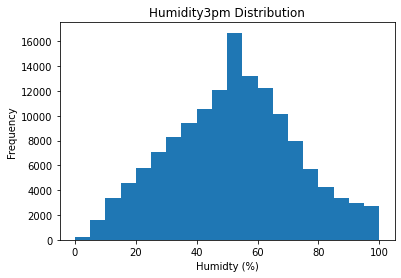

In [27]:
# Handling variabel Humidity3pm dan mengganti null values dengan nilai mean
print(data['Humidity3pm'].describe())
data['Humidity3pm'] = data['Humidity3pm'].fillna(51.482606).astype(float)
plt.hist(data['Humidity3pm'],bins=list(range(0,101,5)))
plt.xlabel('Humidty (%)')
plt.ylabel('Frequency')
plt.title('Humidity3pm Distribution')

count    128179.000000
mean       1017.653758
std           7.105476
min         980.500000
25%        1012.900000
50%        1017.600000
75%        1022.400000
max        1041.000000
Name: Pressure9am, dtype: float64


Text(0.5, 1.0, 'Pressure9am Distribution')

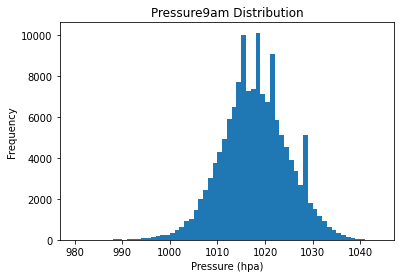

In [28]:
# Handling Variabel Pressure9am dan mengganti null values dengan nilai pada row sebelumnya (forward filling)
print(data['Pressure9am'].describe())
data['Pressure9am'] = data['Pressure9am'].fillna(method='ffill')
plt.hist(data['Pressure9am'],bins=list(range(980,1045,1)))
plt.xlabel('Pressure (hpa)')
plt.ylabel('Frequency')
plt.title('Pressure9am Distribution')

count    128212.000000
mean       1015.258204
std           7.036677
min         977.100000
25%        1010.400000
50%        1015.200000
75%        1020.000000
max        1039.600000
Name: Pressure3pm, dtype: float64


Text(0.5, 1.0, 'Pressure3pm Distribution')

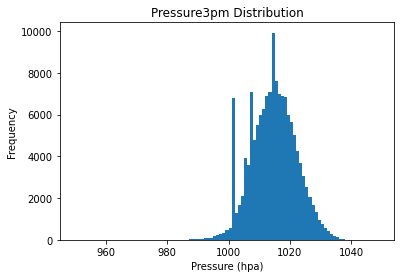

In [29]:
# Handling variabel Pressure3pm dan mengganti null values dengan nilai pada row setelahnya (backward Filling)
print(data['Pressure3pm'].describe())
data['Pressure3pm'] = data['Pressure3pm'].fillna(method='bfill')
plt.hist(data['Pressure3pm'],bins=list(range(950,1050,1)))
plt.xlabel('Pressure (hpa)')
plt.ylabel('Frequency')
plt.title('Pressure3pm Distribution')

count    88536.000000
mean         4.437189
std          2.887016
min          0.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64


Text(0.5, 1.0, 'Cloud9am Distribution')

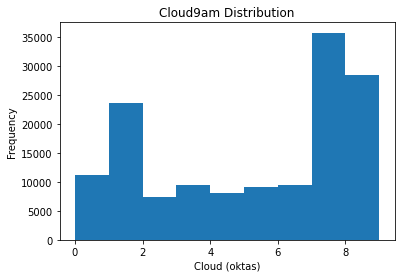

In [30]:
# Handling variabel Cloud9am dan mengganti null values dengan nilai pada row sebelumnya (forward filling)
print(data['Cloud9am'].describe())
data['Cloud9am'] = data['Cloud9am'].fillna(method='ffill')
plt.hist(data['Cloud9am'],bins=list(range(0,10,1)))
plt.xlabel('Cloud (oktas)')
plt.ylabel('Frequency')
plt.title('Cloud9am Distribution')

count    85099.000000
mean         4.503167
std          2.720633
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud3pm, dtype: float64


Text(0.5, 1.0, 'Cloud3pm Distribution')

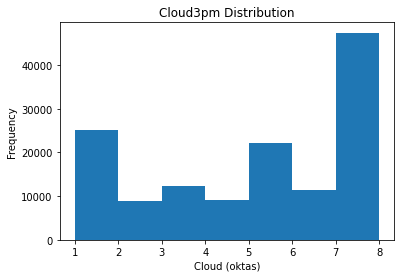

In [31]:
# Handling variabel Cloud3pm dan mengganti null values dengan nilai pada row setelahnya (backward filling)
print(data['Cloud3pm'].describe())
data['Cloud3pm'] = data['Cloud3pm'].fillna(method='bfill')
plt.hist(data['Cloud3pm'],bins=list(range(1,9,1)))
plt.xlabel('Cloud (oktas)')
plt.ylabel('Frequency')
plt.title('Cloud3pm Distribution')

count    141289.000000
mean         16.987509
std           6.492838
min          -7.200000
25%          12.300000
50%          16.700000
75%          21.600000
max          40.200000
Name: Temp9am, dtype: float64


Text(0.5, 1.0, 'Temp9am Distribution')

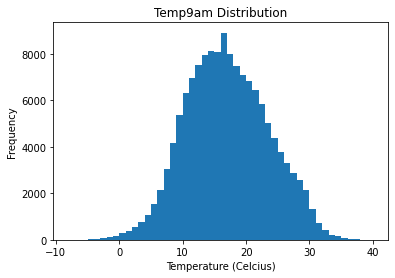

In [32]:
# Handling variabel Temp9am dan mengganti null values dengan nilai meannya
print(data['Temp9am'].describe())
mean = data['Temp9am'].mean()
data['Temp9am'] = data['Temp9am'].fillna(mean).astype(float)
plt.hist(data['Temp9am'],bins=list(range(-8,41,1)))
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Frequency')
plt.title('Temp9am Distribution')

count    139467.000000
mean         21.687235
std           6.937594
min          -5.400000
25%          16.600000
50%          21.100000
75%          26.400000
max          46.700000
Name: Temp3pm, dtype: float64


Text(0.5, 1.0, 'Temp3pm Distribution')

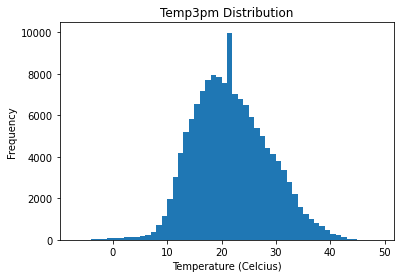

In [33]:
# Handling variabel Temp3pm dan mengganti null values dengan nilai pada row setelahnya (backward filling)
print(data['Temp3pm'].describe())
mean = data['Temp3pm'].mean()
data['Temp3pm'] = data['Temp3pm'].fillna(mean).astype(float)
plt.hist(data['Temp3pm'],bins=list(range(-7,50,1)))
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Frequency')
plt.title('Temp3pm Distribution')

In [34]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

## 2.2 Data Exploration

Sebelum ke proses selanjutnya yaitu handling outliers, feature selection dan imbalance class, kita akan coba mencari insight dari data tiap variabel yang tersedia, karena jika sudah masuk ke outliers akan ada perubahan-perubahan pada data dan juga mencari info yang mungkin bisa kita ambil dari data yang kita punya dan kita hilangkan outlier dan skewness jika ada.

In [35]:
# Kita akan melihat plot jumlah curah hujan setiap tahun, bulan dan setiap kota di Australia
# Membuat Feature baru Month dan Year.
data['Year'] = data['Date'].map(lambda i:i.split('-')[2])
data['Month'] = data['Date'].apply(lambda i:i.split('-')[1])

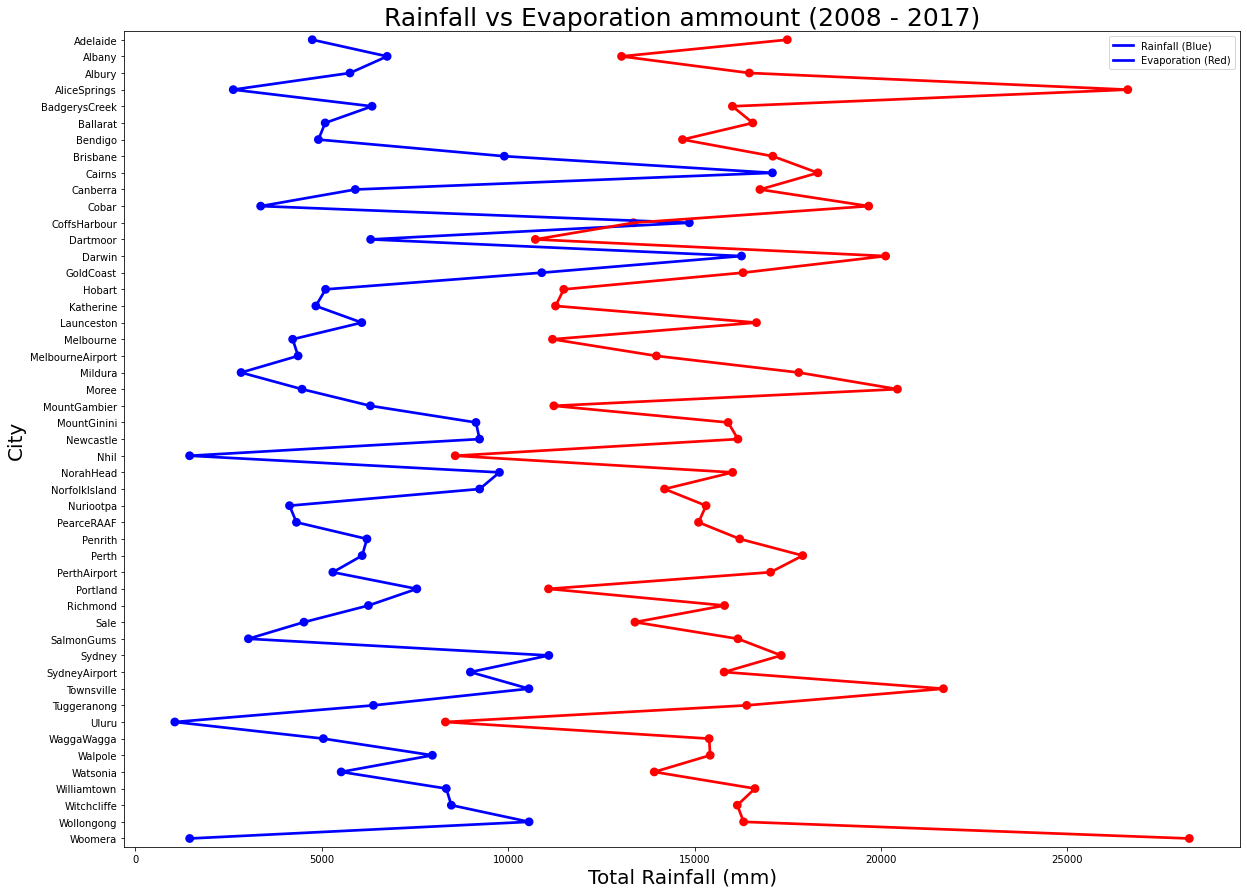

In [36]:
# Membuat dataframe city untuk melihat perbandingan jumlah rainfall dan evaporation di setiap kota
city = pd.DataFrame()
city = data.groupby('Location',as_index=False).sum()
# Memplot point plot perbandingan jumlah rainfall dan evaporation di setiap kota
f,ax = plt.subplots(figsize=(20,15))
sns.pointplot(data=city,x='Rainfall',y='Location',color='blue')
sns.pointplot(data=city,x='Evaporation',y='Location',color='red')
plt.title('Rainfall vs Evaporation ammount (2008 - 2017)',fontsize=25)
plt.xlabel('Total Rainfall (mm)',fontsize=20)
plt.ylabel('City',fontsize=20)
plt.legend(['Rainfall (Blue)','Evaporation (Red)'],loc='upper right')

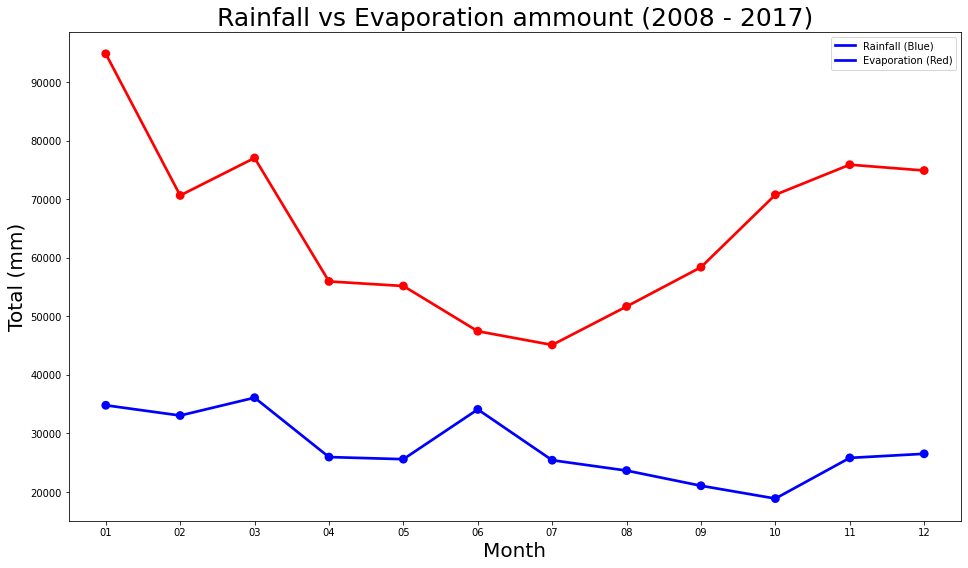

In [37]:
# Membuat dataframe month untuk melihat perbandingan jumlah rainfall dan evaporation pada tiap bulan di seluruh australia
month = pd.DataFrame()
month = data.groupby('Month',as_index=False).sum()
# membuat pointplot perbandingan jumlah rainfall dan evaporation pada tiap bulan di seluruh australia
f,ax = plt.subplots(figsize=(16,9))
sns.pointplot(data=month,y='Rainfall',x='Month',color='blue')
sns.pointplot(data=month,y='Evaporation',x='Month',color='red')
plt.title('Rainfall vs Evaporation ammount (2008 - 2017)',fontsize=25)
plt.ylabel('Total (mm)',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.legend(['Rainfall (Blue)','Evaporation (Red)'],loc='upper right')

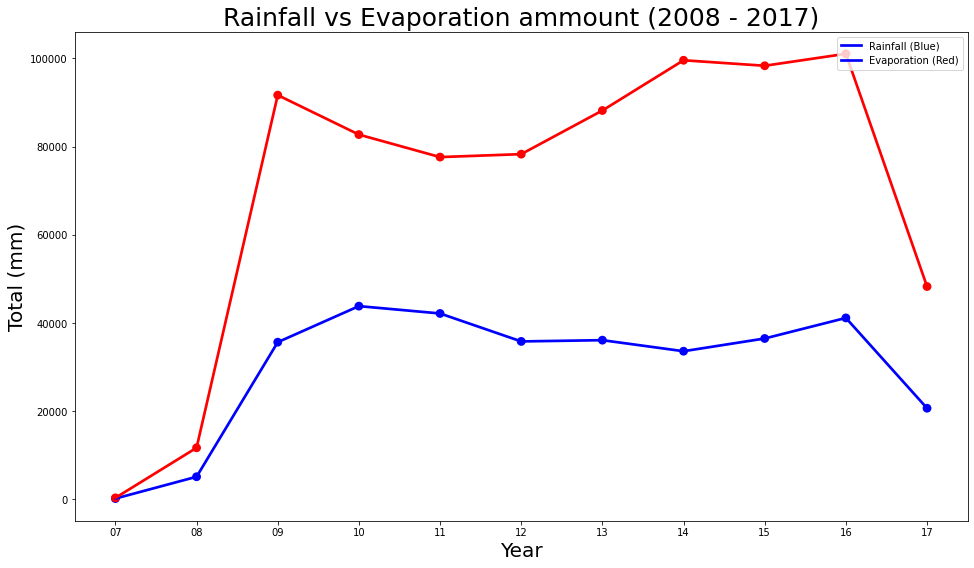

In [38]:
# Membuat dataframe year untuk melihat perbandingan jumlah rainfall dan evaporation pada tiap tahun di australia
year = pd.DataFrame()
year = data.groupby('Year',as_index=False).sum()
# membuat point plot perbandingan jumlah rainfall dan evaporation pada tiap tahun di australia
f,ax = plt.subplots(figsize=(16,9))
sns.pointplot(data=year,y='Rainfall',x='Year',color='blue')
sns.pointplot(data=year,y='Evaporation',x='Year',color='red')
plt.title('Rainfall vs Evaporation ammount (2008 - 2017)',fontsize=25)
plt.ylabel('Total (mm)',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.legend(['Rainfall (Blue)','Evaporation (Red)'],loc='upper right')

Dapat dilihat pada 3 figure di atas bahwa jumlah evaporation memiiki hubungan positif dengan jumlah rainfall pada data ini. dan Jumlah Evaporation sela lebih besar dari jumlah rainfall pada tiap city, month dan year pada figure di atas.


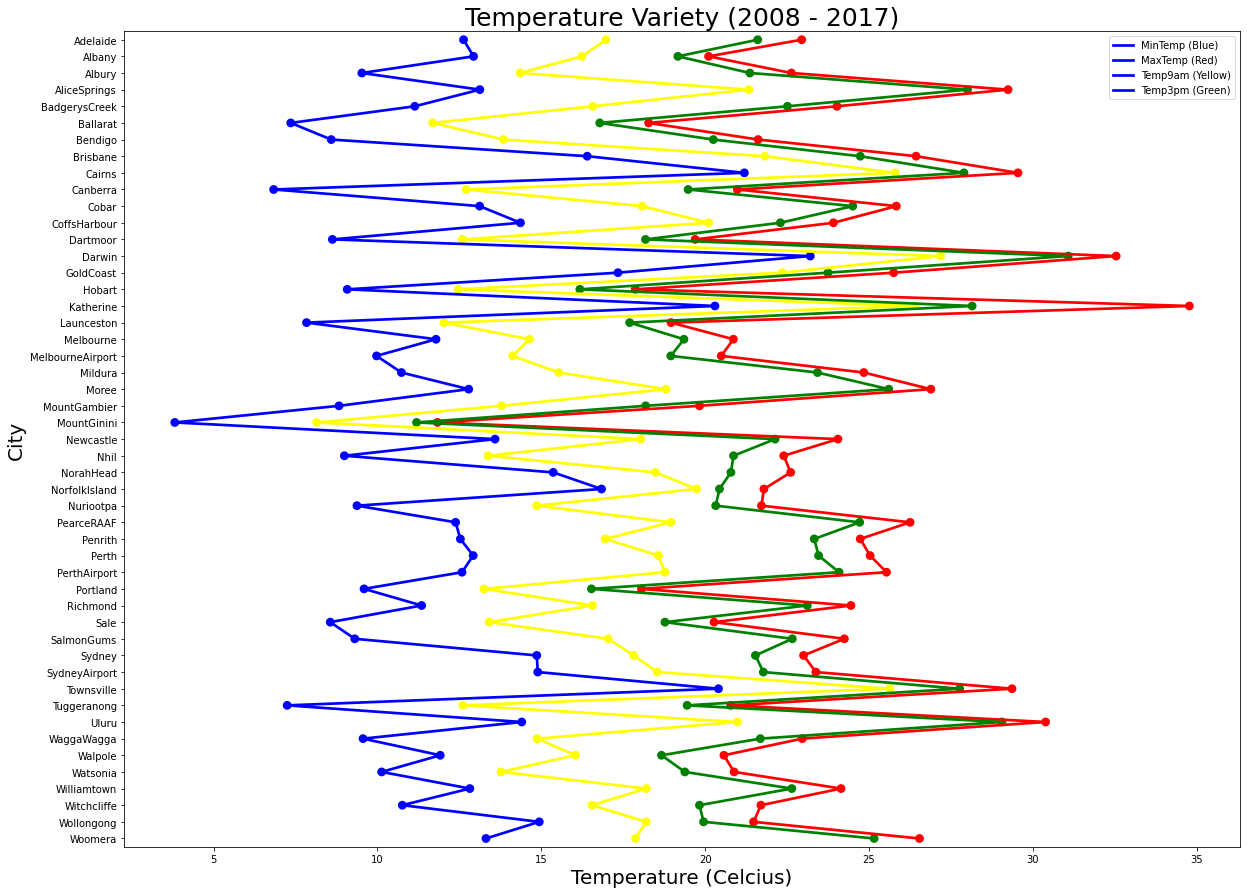

In [39]:
# Membuat dataframe city untuk melihat perbandingan rata - rata MinTemp dan MaxTemp di setiap kota
city = pd.DataFrame()
city = data.groupby('Location',as_index=False).mean()
# Memplot point plot perbandingan jumlah MinTemp dan MaxTemp di setiap kota
f,ax = plt.subplots(figsize=(20,15))
sns.pointplot(data=city,x='MinTemp',y='Location',color='blue')
sns.pointplot(data=city,x='MaxTemp',y='Location',color='red')
sns.pointplot(data=city, x='Temp9am',y='Location',color='yellow')
sns.pointplot(data=city,x='Temp3pm',y='Location',color='green')
plt.title('Temperature Variety (2008 - 2017)',fontsize=25)
plt.xlabel('Temperature (Celcius)',fontsize=20)
plt.ylabel('City',fontsize=20)
plt.legend(['MinTemp (Blue)','MaxTemp (Red)', 'Temp9am (Yellow)','Temp3pm (Green)'],loc='upper right')

Berdasarkan grafik di atas kota Mount Ginini adalah kota yang memiliki range Temperatur terendah di Australia (2 - 12 Celcius), sedangkan kota Katherine adalah kota yang memiliki range temperatur tertinggi di Australia (20 - 35 Celcius).

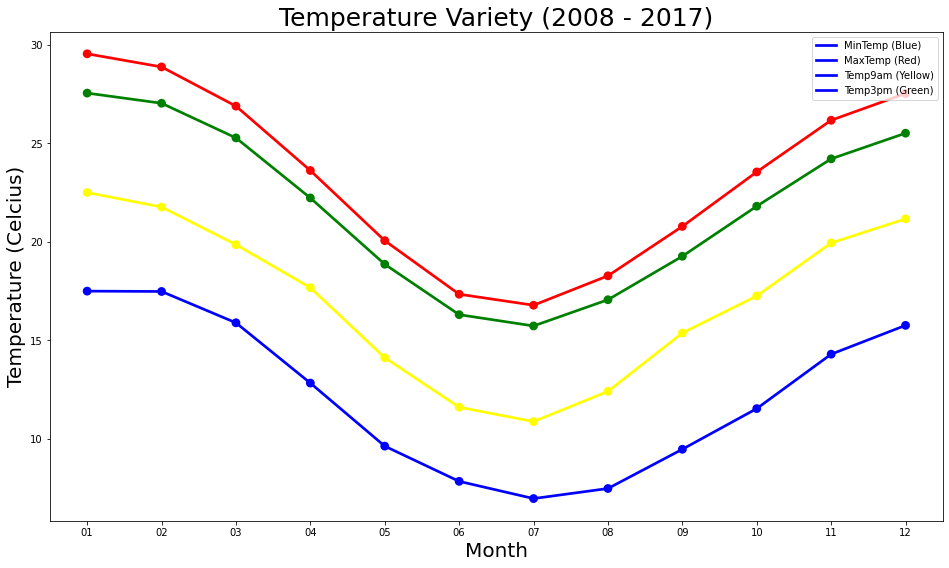

In [40]:
# Membuat dataframe month untuk melihat perbandingan rata - rata MinTemp dan MaxTemp pada tiap bulan di seluruh australia
month = pd.DataFrame()
month = data.groupby('Month',as_index=False).mean()
# membuat pointplot perbandingan rata - rata MinTemp dan MaxTemp pada tiap bulan di seluruh australia
f,ax = plt.subplots(figsize=(16,9))
sns.pointplot(data=month,y='MinTemp',x='Month',color='blue')
sns.pointplot(data=month,y='MaxTemp',x='Month',color='red')
sns.pointplot(data=month, y='Temp9am',x='Month',color='yellow')
sns.pointplot(data=month,y='Temp3pm',x='Month',color='green')
plt.title('Temperature Variety (2008 - 2017)',fontsize=25)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Temperature (Celcius)',fontsize=20)
plt.legend(['MinTemp (Blue)','MaxTemp (Red)', 'Temp9am (Yellow)','Temp3pm (Green)'],loc='upper right')

Berdasarkan grafik di atas setiap bulannya rata - rata temperature di Australia memiliki range yang tetap selama 2007 - 2017.
Bulan januari memiliki rata - rata temperatur tertinggi yaitu 17 - 29 derajat celcius. sedangkan bulan July memiliki rata - rata temperatur terendah yaitu 8 - 17 derajat celcius.

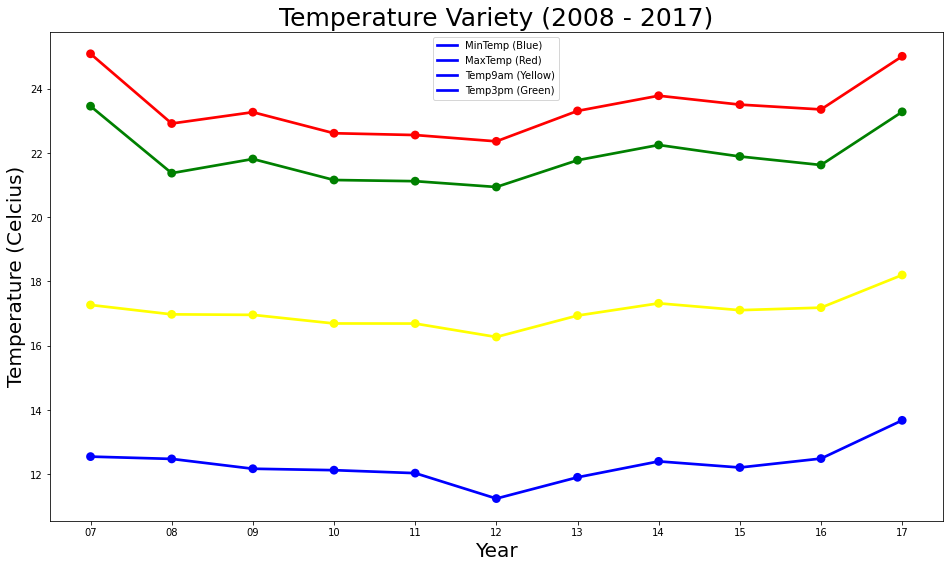

In [41]:
# Membuat dataframe year untuk melihat perbandingan rata - rata MinTemp dan MaxTemp pada tiap tahun di seluruh australia
year = pd.DataFrame()
year = data.groupby('Year',as_index=False).mean()
# membuat point plot 
f,ax = plt.subplots(figsize=(16,9))
sns.pointplot(data=year,y='MinTemp',x='Year',color='blue',)
sns.pointplot(data=year,y='MaxTemp',x='Year',color='red')
sns.pointplot(data=year, y='Temp9am',x='Year',color='yellow')
sns.pointplot(data=year,y='Temp3pm',x='Year',color='green')
plt.title('Temperature Variety (2008 - 2017)',fontsize=25)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Temperature (Celcius)',fontsize=20)
plt.legend(['MinTemp (Blue)','MaxTemp (Red)', 'Temp9am (Yellow)','Temp3pm (Green)'])


Berdasarkan grafik di atas setiap tahunnya rata - rata temperature di Australia memiliki range yang tetap selama 2007 - 2017.
tahun 2017 memiliki rata - rata temperatur tertinggi yaitu 14 - 25 derajat celcius. sedangkan tahun 2012 memiliki rata - rata temperatur terendah yaitu 12 - 23 derajat celcius.

In [42]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Year             0
Month            0
dtype: int64

Text(0.5, 1.0, 'Wind Speed 9am vs Wind Speed 3 pm')

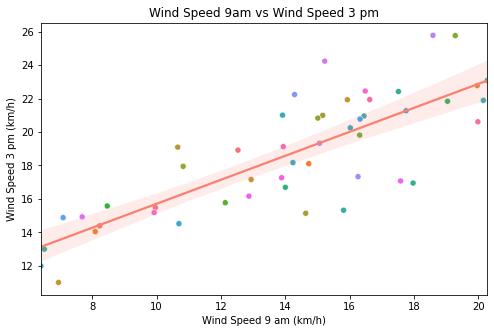

In [43]:
# Kita akan melihat perbandingan rata - rata kecepatan angin pada jam 9 a.m dan jam 3 p.m pada tiap kota penelitian
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=city,x='WindSpeed9am',y='WindSpeed3pm',hue='Location',legend=False)
sns.regplot(data=city,x='WindSpeed9am',y='WindSpeed3pm',scatter=False,color='salmon')
plt.xlabel('Wind Speed 9 am (km/h)')
plt.ylabel('Wind Speed 3 pm (km/h)')
plt.title('Wind Speed 9am vs Wind Speed 3 pm')



Text(0.5, 1.0, 'Wind Speed 9am vs Wind Speed 3 pm')

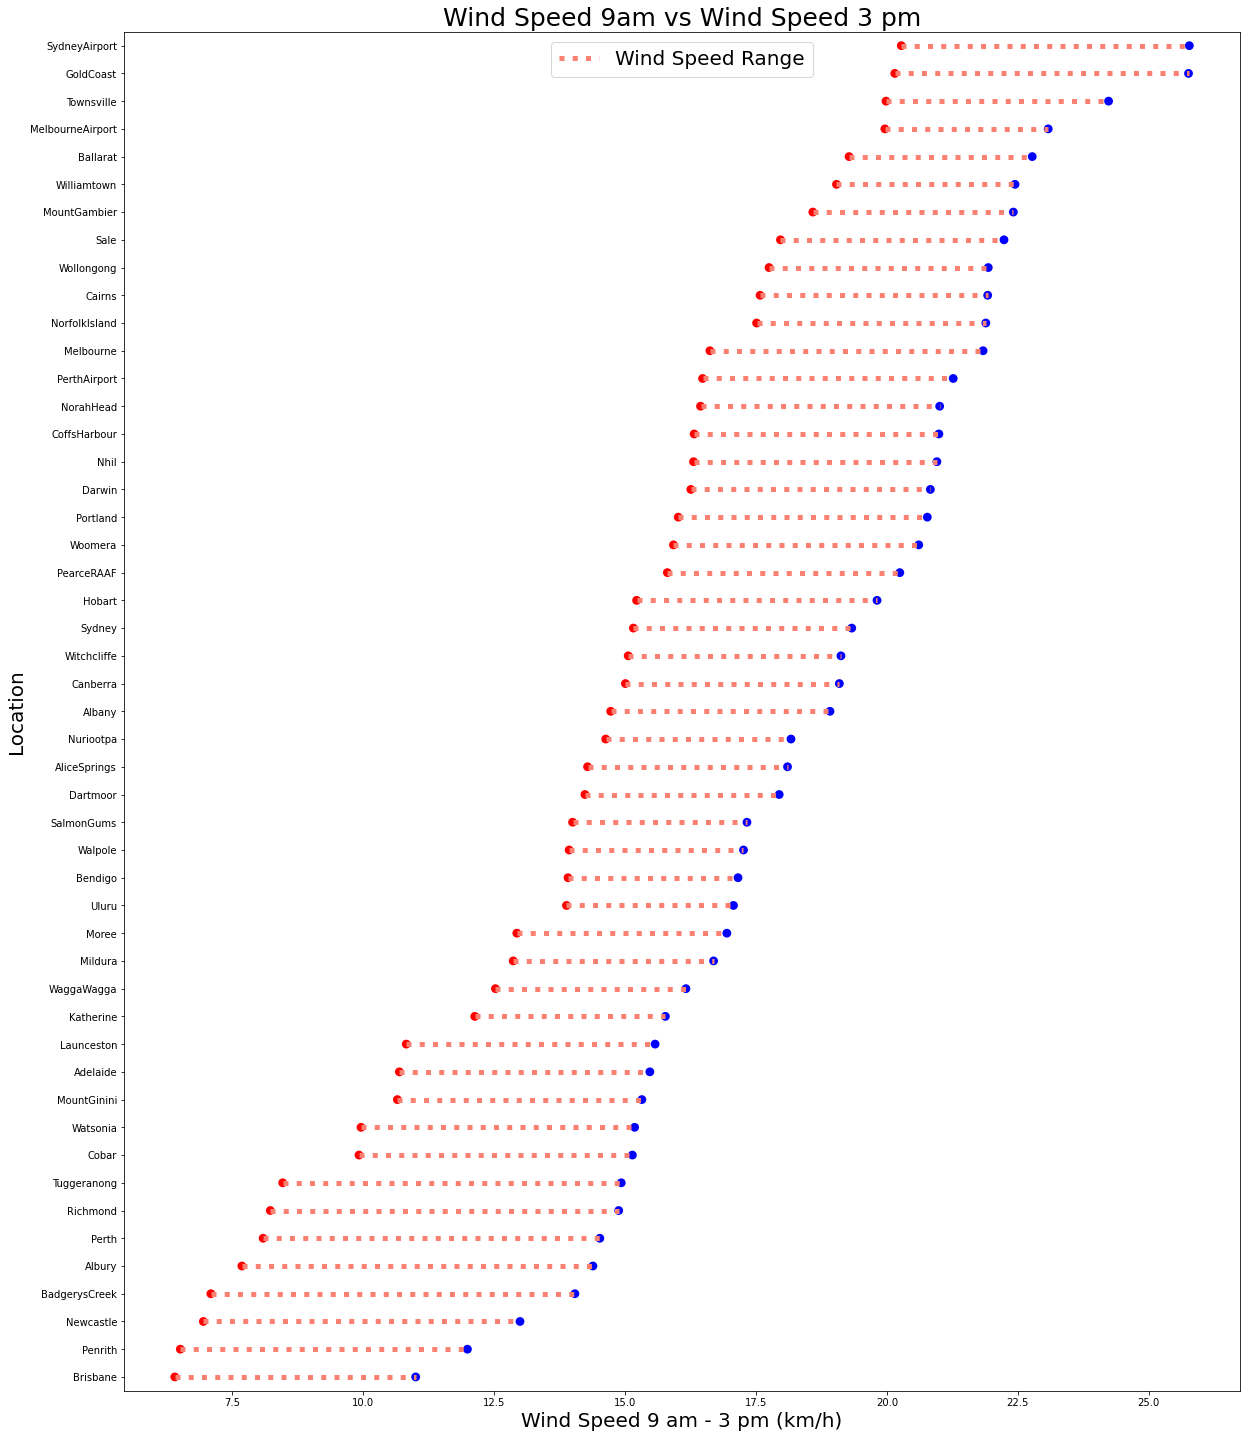

In [44]:
fig,ax = plt.subplots(1, figsize=(20,25))
plt.hlines(y=city['Location'], xmin=city['WindSpeed9am'].sort_values(ascending=False)
            , xmax=city['WindSpeed3pm'].sort_values(ascending=False),colors='salmon',ls=':', lw=5, label='Wind Speed Range')
sns.pointplot(data=city.sort_values('WindSpeed9am',ascending=False),y='Location',x='WindSpeed9am',color='r',linestyles='None')
sns.pointplot(data=city.sort_values('WindSpeed3pm',ascending=False),y='Location',x='WindSpeed3pm',color='b',linestyles='None')
plt.legend(loc='upper center', fontsize=20)
plt.ylabel('Location',fontsize=20)
plt.xlabel('Wind Speed 9 am - 3 pm (km/h)',fontsize=20)
plt.title('Wind Speed 9am vs Wind Speed 3 pm',fontsize = 25)


Text(0.5, 1.0, 'Wind Speed 9am vs Wind Speed 3 pm')

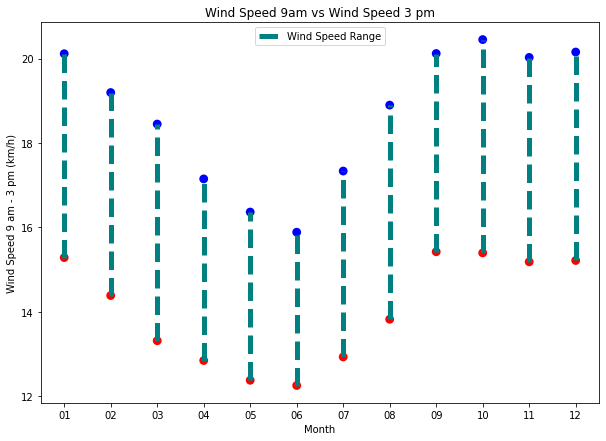

In [45]:
# Kita akan melihat perbandingan rata - rata kecepatan angin pada jam 9 a.m dan jam 3 p.m pada setiap bulan dari tahun 2007 - 2017
fig,ax = plt.subplots(1, figsize=(10,7))
plt.vlines(x=month['Month'], ymin=month['WindSpeed9am'], ymax=month['WindSpeed3pm'],colors='teal',ls='--', lw=5, label='Wind Speed Range')
sns.pointplot(data=month,x='Month',y='WindSpeed9am',color='r',linestyles='None')
sns.pointplot(data=month,x='Month',y='WindSpeed3pm',color='b',linestyles='None')
plt.legend(loc='upper center')
plt.xlabel('Month')
plt.ylabel('Wind Speed 9 am - 3 pm (km/h)')
plt.title('Wind Speed 9am vs Wind Speed 3 pm')

Text(0.5, 1.0, 'Wind Speed 9am vs Wind Speed 3 pm')

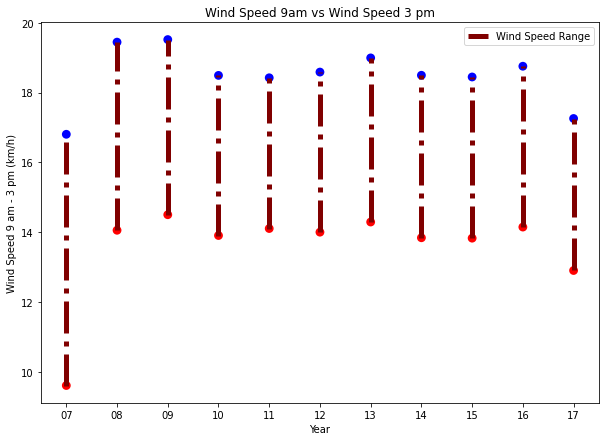

In [46]:
# Kita akan melihat perbandingan rata - rata kecepatan angin pada jam 9 a.m dan jam 3 p.m pada setiap tahun dari tahun 2007 - 2017
fig,ax = plt.subplots(1, figsize=(10,7))
plt.vlines(x=year['Year'], ymin=year['WindSpeed9am'], ymax=year['WindSpeed3pm'],colors='maroon',ls='-.', lw=5, label='Wind Speed Range')
sns.pointplot(data=year,x='Year',y='WindSpeed9am',color='r',linestyles='None')
sns.pointplot(data=year,x='Year',y='WindSpeed3pm',color='b',linestyles='None')
plt.legend(loc=0)
plt.xlabel('Year')
plt.ylabel('Wind Speed 9 am - 3 pm (km/h)')
plt.title('Wind Speed 9am vs Wind Speed 3 pm')

Dari grafik di atas dapat dikatakan bahwa kecepatan angin pada jam 9 am dan 3 pm di setiap lokasi penelitian memiliki hubungan positif dan Brisbane merupakan lokasi dengan kecepatan angin terendah dan Sydney Airport merupakan lokasi dengan kecepatan angin tertinggi.
Bulan Juni merupakan bulan dengan kecapatan angin terendah, sedangkan bulan oktober merupakan bulan dengan kecepatan angin tertinggi. 
Sementara itu Tahun 2007 merupakan tahun dengan kecepatan angin terendah, sedangkan tahun 2009 merupakan tahun dengan kecepatan angin yang tertinggi.

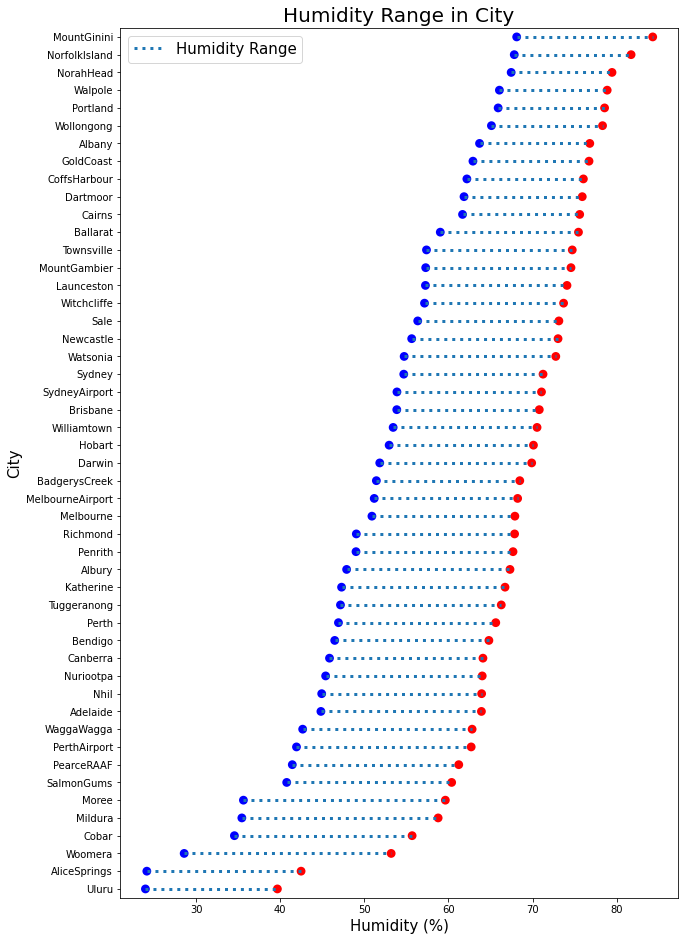

In [47]:
# Kita akan melihat perbandingan rata - rata dar feature Humidity saat pukul 9 am dan 3 pm pada tiap lokasi penelitian
f, ax = plt.subplots(figsize=(10,16))
plt.hlines(y=city['Location'],xmin=city.Humidity3pm.sort_values(ascending=False),
            xmax=city.Humidity9am.sort_values(ascending=False),ls=':',lw=3,label='Humidity Range')
sns.pointplot(data=city.sort_values('Humidity9am',ascending=False),y='Location',x='Humidity9am',color='r',linestyles='None')
sns.pointplot(data=city.sort_values('Humidity3pm',ascending=False),y='Location',x='Humidity3pm',color='b',linestyles='None')
plt.title('Humidity Range in City',fontsize=20)
plt.ylabel('City',fontsize=15)
plt.xlabel('Humidity (%)',fontsize=15)
plt.legend(loc='upper left',fontsize=15)

berdasarkan grafik di atas kota uluru memiliki persentase kelembapan terendah, sedangkan kota Mount Ginini memiliki presentase kelembapan tertinggi di Australia. dan kelembapan pada jam 9 am lebih tinggi presentase nya dari pada jam 3 pm.

Text(0, 0.5, 'Humidity (%)')

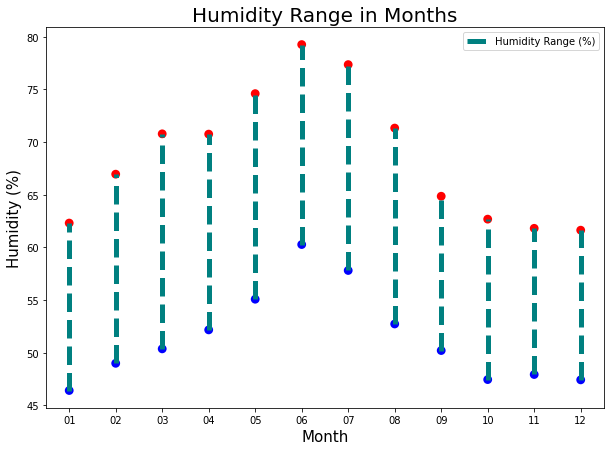

In [48]:
# Kita akan melihat perbandingan rata - rata persentase kelembapan (Humidity) pada jam 9 a.m dan jam 3 p.m pada setiap bulan dari tahun 2007 - 2017
fig,ax = plt.subplots(1, figsize=(10,7))
plt.vlines(x=month['Month'], ymin=month['Humidity3pm'], ymax=month['Humidity9am'],colors='teal',ls='--', lw=5, label='Humidity Range (%)')
sns.pointplot(data=month,x='Month',y='Humidity9am',color='r',linestyles='None')
sns.pointplot(data=month,x='Month',y='Humidity3pm',color='b',linestyles='None')
plt.legend(loc=0)
plt.xlabel('Month',fontsize=15)
plt.title('Humidity Range in Months',fontsize=20)
plt.ylabel('Humidity (%)',fontsize=15)

Text(0, 0.5, 'Humidity (%)')

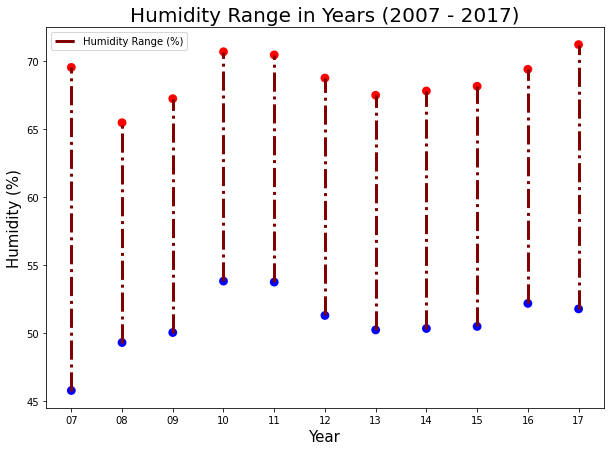

In [49]:
# Kita akan melihat perbandingan rata - rata persentase kelembapan (Humidity) pada jam 9 a.m dan jam 3 p.m pada setiap tahun dari tahun 2007 - 2017
fig,ax = plt.subplots(1,figsize=(10,7))
plt.vlines(x=year['Year'], ymin=year['Humidity3pm'], ymax=year['Humidity9am'],colors='maroon',ls='-.', lw=3, label='Humidity Range (%)')
sns.pointplot(data=year,x='Year',y='Humidity9am',color='r',linestyles='None')
sns.pointplot(data=year,x='Year',y='Humidity3pm',color='b',linestyles='None')
plt.legend(loc=0)
plt.xlabel('Year',fontsize=15)
plt.title('Humidity Range in Years (2007 - 2017)',fontsize=20)
plt.ylabel('Humidity (%)',fontsize=15)

Berdasrkan grafik di atas, tingkat kelembapan terendah jatuh pada bulan januari dan tahun 2007, sedangkan tingkat kelembapan tertinggi jatuh pada bulan Juni dan tahun 2010. 

## 2.3 Handling Outliers

Kita akan melihat apakah ada outlier di data kita dan akan kita coba untuk menanganinya agar tidak teradi salah interpretasi terhadap target varibel kita. Namun kita perlu cek juga apakah outlier ini salah input atau memang dia anomali.

saya akan menggunakan 3 metode dalam handling outlier ini:
1. Apabila jumlah outliers hanya sedikit, yaitu <= 7 % dataset, maka outliers tersebut akan di drop.
2. Apabila jumlah outliers cukup banyak, yaitu > 7% dataset, maka kita akan menggunakan natural log transformation. yaitu dengan melakukan logaritma terhadap nilai outliers tersebut tapi bukan dengan base 10, melainkan e (2.7182818)
3. Apabila jumlah outliers cukup banyak, yaitu > 7 % kolom, dan outliers itu bernilai <= 0 tapi tidak bisa di drop karena kita berasumsi outliers tersebut memiliki informasi yang penting, maka outliers tersebut akan kita biarkan. 
  

In [50]:
#Kita akan menggunakan Inter Quartile Range untuk menangani ouliers
#Kita akan membuat class outlier yang mempunyai function untuk menentukan limit dan mencari berapa banyak outliers pada variabel
class outliers():
    def limit(self,i):
        self.q1 = data[i].quantile(0.25)
        self.q3 = data[i].quantile(0.75)
        IQR = self.q3 - self.q1
    
        #menentukan limit biasa dan limit ekstim
        self.lower_limit = data[i].quantile(0.25) - (IQR * 1.5)
        self.lower_limit_extreme = data[i].quantile(0.25) - (IQR * 3)
        self.upper_limit = data[i].quantile(0.75) + (IQR * 1.5)
        self.upper_limit_extreme = data[i].quantile(0.75) + (IQR * 3)
        print('Lower Limit:', self.lower_limit)
        print('Lower Limit Extreme:', self.lower_limit_extreme)
        print('Upper Limit:', self.upper_limit)
        print('Upper Limit Extreme:', self.upper_limit_extreme)
    
    # Fungsi untuk mencari jumlah outliers dalam dataset
    def percent_outliers(self,i):
        print('Lower Limit: {} %'.format(data[(data[i] <= self.lower_limit)].shape[0]/ data.shape[0]*100))
        print('Lower Limit Extereme: {} %'.format(data[(data[i] <= self.lower_limit_extreme)].shape[0]/data.shape[0]*100))
        print('Upper Limit: {} %'.format(data[(data[i] >= self.upper_limit)].shape[0]/ data.shape[0]*100))
        print('Upper Limit Extereme: {} %'.format(data[(data[i] >= self.upper_limit_extreme)].shape[0]/data.shape[0]*100))  


Lower Limit: -6.200000000000001
Lower Limit Extreme: -20.0
Upper Limit: 30.6
Upper Limit Extreme: 44.400000000000006
None
--------------------------------------------------
Lower Limit: 0.036570013995063044 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.007032694999050586 %
Upper Limit Extereme: 0.0 %
None


Text(0.5, 0, 'Jumlah')

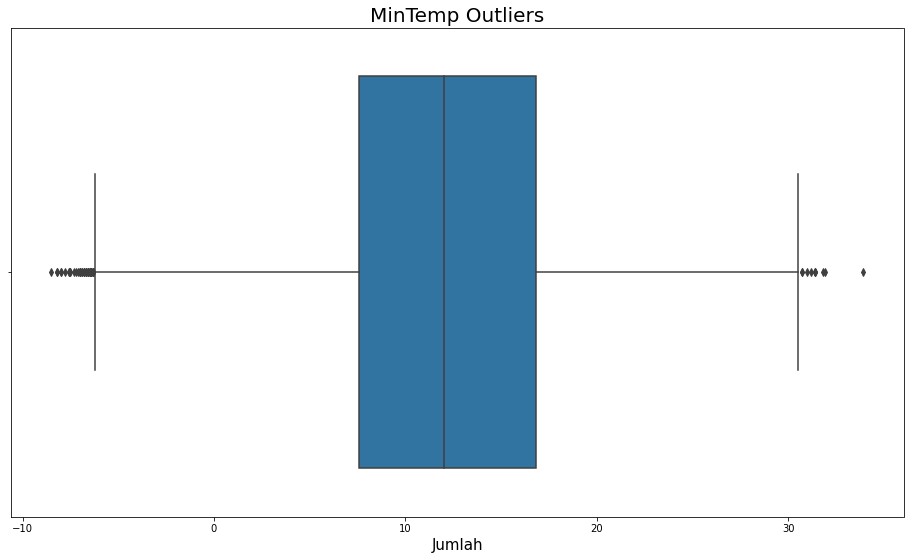

In [51]:
# Kita akan mengecek outlier pada kolom MinTemp
ol = outliers()
print(ol.limit('MinTemp'))
print('-'*50)
print(ol.percent_outliers('MinTemp'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['MinTemp'])
plt.title('MinTemp Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

In [52]:
# Karena kurang dari 1 persen outliers maka saya akan drop saja
data.drop(data[(data['MinTemp'] < ol.lower_limit)].index, inplace=True)
data.drop(data[(data['MinTemp'] > ol.upper_limit)].index, inplace=True)
print(ol.percent_outliers('MinTemp'))
print('Skewness of this column :', data['MinTemp'].skew())


Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None
Skewness of this column : 0.02928306251788213


In [53]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Year', 'Month'],
      dtype='object')

Lower Limit: 2.700000000000001
Lower Limit Extreme: -12.599999999999998
Upper Limit: 43.5
Upper Limit Extreme: 58.8
None
--------------------------------------------------
Lower Limit: 0.21318361230132765 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.13719737425332967 %
Upper Limit Extereme: 0.0 %
None


Text(0.5, 0, 'Jumlah')

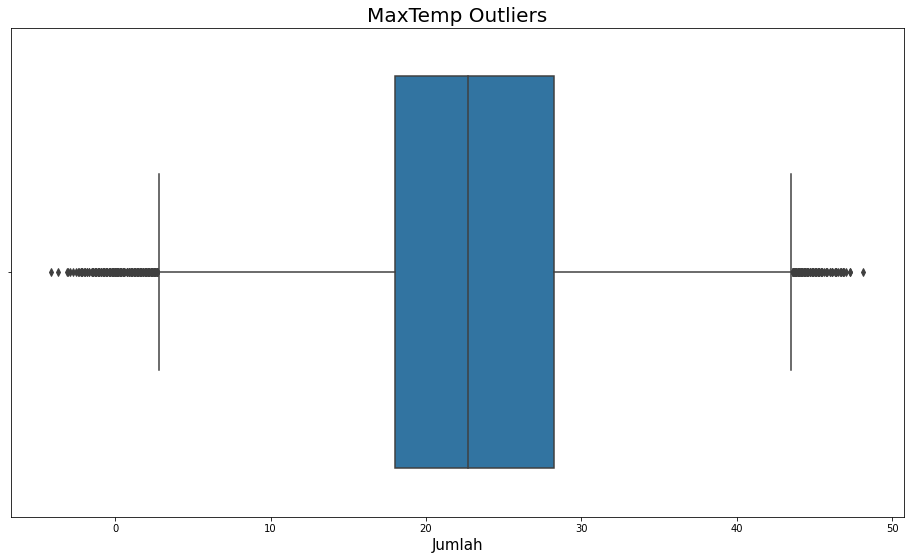

In [54]:
# Kita akan mengecek outlier pada kolom MaxTemp
ol = outliers()
print(ol.limit('MaxTemp'))
print('-'*50)
print(ol.percent_outliers('MaxTemp'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['MaxTemp'])
plt.title('MaxTemp Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

In [55]:
# Karena kurang dari 1 persen outliers maka saya akan drop saja
data.drop(data[(data['MaxTemp'] < ol.lower_limit)].index, inplace=True)
data.drop(data[(data['MaxTemp'] >= ol.upper_limit)].index, inplace=True)
print(ol.percent_outliers('MaxTemp'))
print('Skewness of this column :', data['MaxTemp'].skew())


Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None
Skewness of this column : 0.2686008376030756


Lower Limit: 8.5
Lower Limit Extreme: -14.0
Upper Limit: 68.5
Upper Limit Extreme: 91.0
None
--------------------------------------------------
Lower Limit: 0.013414952729942881 %
Lower Limit Extereme: 0.0 %
Upper Limit: 3.7152358560504966 %
Upper Limit Extereme: 0.3374919686796156 %
None


Text(0.5, 0, 'Jumlah')

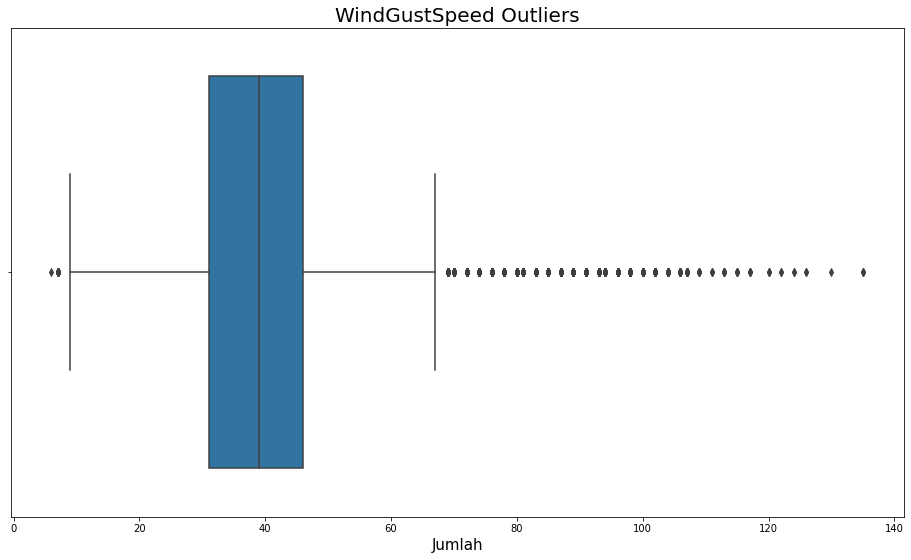

In [56]:
# Kita akan mengecek outlier pada kolom WindGustSpeed
ol = outliers()
print(ol.limit('WindGustSpeed'))
print('-'*50)
print(ol.percent_outliers('WindGustSpeed'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['WindGustSpeed'])
plt.title('WindGustSpeed Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

In [57]:
# Karena kurang dari 4 persen outliers maka saya akan drop saja
data.drop(data[(data['WindGustSpeed'] < ol.lower_limit)].index, inplace=True)
data.drop(data[(data['WindGustSpeed'] > ol.upper_limit)].index, inplace=True)
print(ol.percent_outliers('WindGustSpeed'))
print('Skewness of this column :', data['WindGustSpeed'].skew())

Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None
Skewness of this column : 0.2343611678255923


Lower Limit: -11.0
Lower Limit Extreme: -29.0
Upper Limit: 37.0
Upper Limit Extreme: 55.0
None
--------------------------------------------------
Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.8698075569115232 %
Upper Limit Extereme: 0.019068293827739967 %
None


Text(0.5, 0, 'Jumlah')

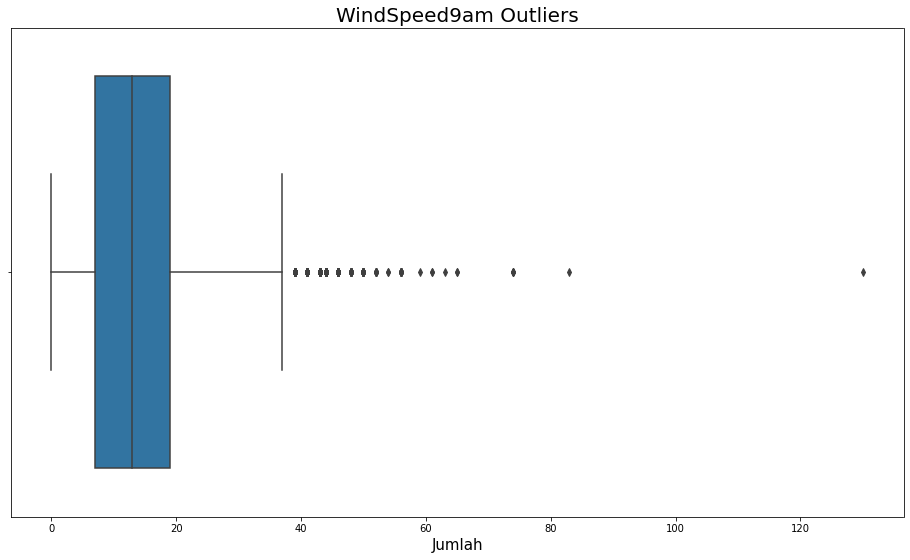

In [58]:
# Kita akan mengecek outlier pada kolom WindSpeed9am
ol = outliers()
print(ol.limit('WindSpeed9am'))
print('-'*50)
print(ol.percent_outliers('WindSpeed9am'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['WindSpeed9am'])
plt.title('WindSpeed9am Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

In [59]:
# Karena kurang dari 1 persen outliers maka saya akan drop saja
data.drop(data[(data['WindSpeed9am'] < ol.lower_limit)].index, inplace=True)
data.drop(data[(data['WindSpeed9am'] >= ol.upper_limit)].index, inplace=True)
print(ol.percent_outliers('WindSpeed9am'))
print('Skewness of this column :', data['WindSpeed9am'].skew())

Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None
Skewness of this column : 0.3621597235206584


Lower Limit: -3.5
Lower Limit Extreme: -20.0
Upper Limit: 40.5
Upper Limit Extreme: 57.0
None
--------------------------------------------------
Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.6621487652220234 %
Upper Limit Extereme: 0.004438986135566637 %
None


Text(0.5, 0, 'Jumlah')

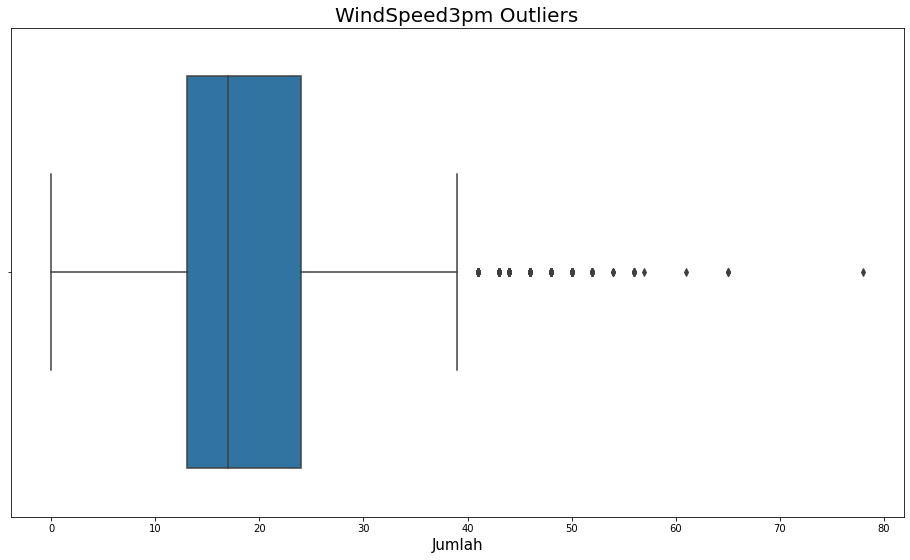

In [60]:
# Kita akan mengecek outlier pada kolom WindSpeed3pm
ol = outliers()
print(ol.limit('WindSpeed3pm'))
print('-'*50)
print(ol.percent_outliers('WindSpeed3pm'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['WindSpeed3pm'])
plt.title('WindSpeed3pm Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

In [61]:
# Karena kurang dari 1 persen outliers maka saya akan drop saja
data.drop(data[(data['WindSpeed3pm'] < ol.lower_limit)].index, inplace=True)
data.drop(data[(data['WindSpeed3pm'] > ol.upper_limit)].index, inplace=True)
print(ol.percent_outliers('WindSpeed3pm'))
print('Skewness of this column :', data['WindSpeed3pm'].skew())

Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None
Skewness of this column : 0.24406971114681872


Lower Limit: 20.5
Lower Limit Extreme: -17.0
Upper Limit: 120.5
Upper Limit Extreme: 158.0
None
--------------------------------------------------
Lower Limit: 1.3547229111274959 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None


Text(0.5, 0, 'Jumlah')

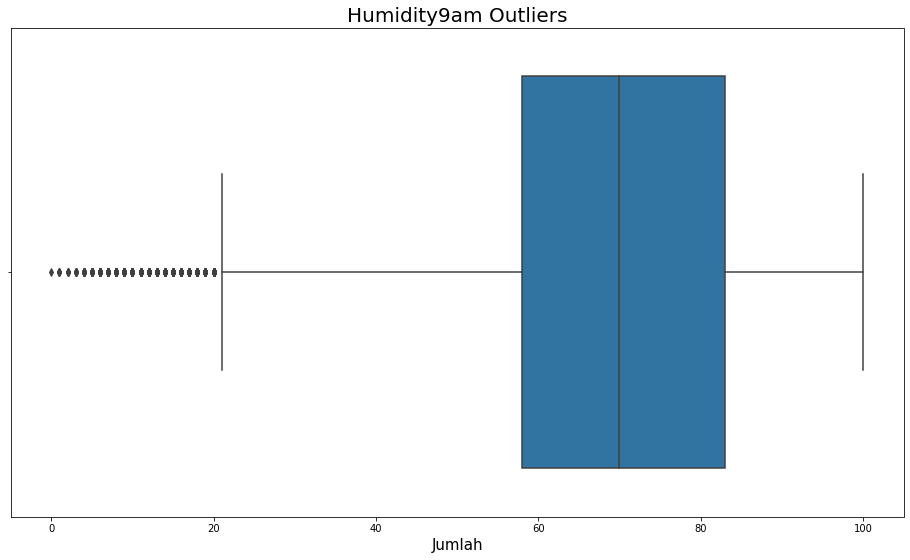

In [62]:
# Kita akan mengecek outlier pada kolom Humidity9am
ol = outliers()
print(ol.limit('Humidity9am'))
print('-'*50)
print(ol.percent_outliers('Humidity9am'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['Humidity9am'])
plt.title('Humidity9am Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

In [63]:
# Karena kurang dari 1 persen outliers maka saya akan drop saja
data.drop(data[(data['Humidity9am'] < ol.lower_limit)].index, inplace=True)
print(ol.percent_outliers('Humidity9am'))
print('Skewness of this column :', data['Humidity9am'].skew())

Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None
Skewness of this column : -0.3063099529158707


Lower Limit: -2.5
Lower Limit Extreme: -43.0
Upper Limit: 105.5
Upper Limit Extreme: 146.0
None
--------------------------------------------------
Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None


Text(0.5, 0, 'Jumlah')

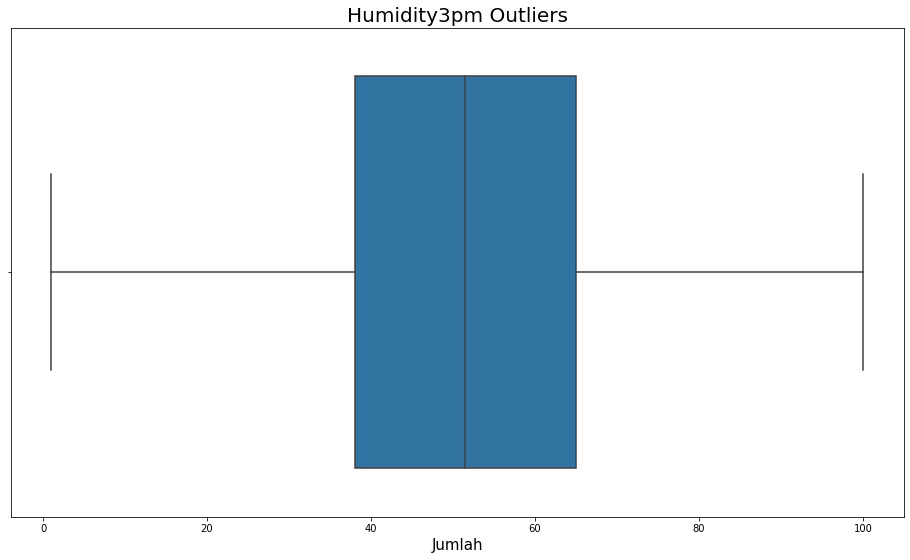

In [64]:
# Kita akan mengecek outlier pada kolom Humidity3pm
ol = outliers()
print(ol.limit('Humidity3pm'))
print('-'*50)
print(ol.percent_outliers('Humidity3pm'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['Humidity3pm'])
plt.title('Humidity3pm Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

Tidak ada outliers dalam kolom ini jadi kita biarkan saja

Lower Limit: 1000.6999999999998
Lower Limit Extreme: 987.4999999999998
Upper Limit: 1035.9
Upper Limit Extreme: 1049.1000000000004
None
--------------------------------------------------
Lower Limit: 0.6047473801830098 %
Lower Limit Extereme: 0.009059885845438346 %
Upper Limit: 0.394860024763688 %
Upper Limit Extereme: 0.0 %
None


Text(0.5, 0, 'Jumlah')

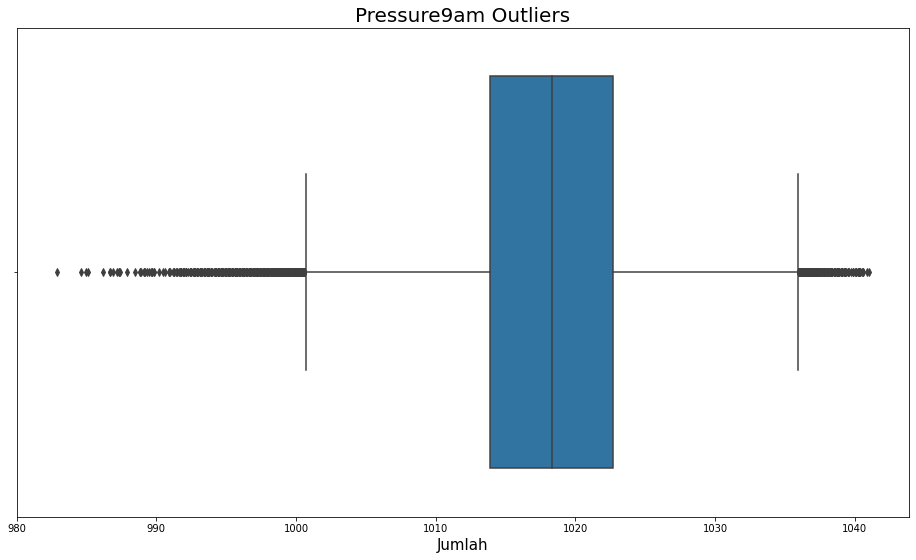

In [65]:
# Kita akan mengecek outlier pada kolom Pressure9am
ol = outliers()
print(ol.limit('Pressure9am'))
print('-'*50)
print(ol.percent_outliers('Pressure9am'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['Pressure9am'])
plt.title('Pressure9am Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

In [66]:
# Karena kurang dari 1 persen outliers maka saya akan drop saja
data.drop(data[(data['Pressure9am'] < ol.lower_limit)].index, inplace=True)
data.drop(data[(data['Pressure9am'] > ol.upper_limit)].index, inplace=True)
print(ol.percent_outliers('Pressure9am'))
print('Skewness of this column :', data['Pressure9am'].skew())

Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.02363543485387964 %
Upper Limit Extereme: 0.0 %
None
Skewness of this column : 0.06856134457965418


Lower Limit: 995.1999999999998
Lower Limit Extreme: 980.4999999999998
Upper Limit: 1034.4
Upper Limit Extreme: 1049.1000000000004
None
--------------------------------------------------
Lower Limit: 0.024397868236262856 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0373592357367775 %
Upper Limit Extereme: 0.0 %
None


Text(0.5, 0, 'Jumlah')

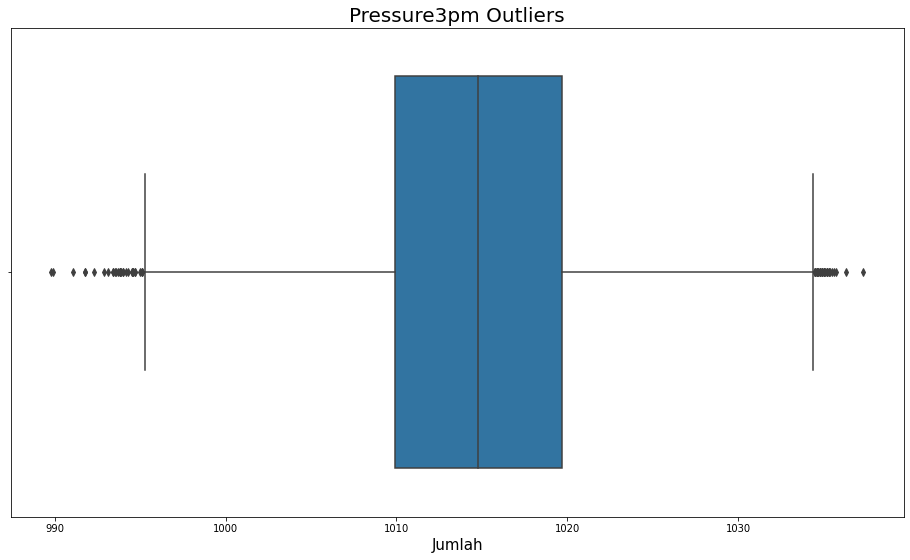

In [67]:
# Kita akan mengecek outlier pada kolom Pressure3pm
ol = outliers()
print(ol.limit('Pressure3pm'))
print('-'*50)
print(ol.percent_outliers('Pressure3pm'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['Pressure3pm'])
plt.title('Pressure3pm Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

In [68]:
# Karena kurang dari 1 persen outliers maka saya akan drop saja
data.drop(data[(data['Pressure3pm'] < ol.lower_limit)].index, inplace=True)
data.drop(data[(data['Pressure3pm'] > ol.upper_limit)].index, inplace=True)
print(ol.percent_outliers('Pressure3pm'))
print('Skewness of this column :', data['Pressure3pm'].skew())

Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.005340046534691231 %
Upper Limit Extereme: 0.0 %
None
Skewness of this column : 0.012102051432050726


Lower Limit: -5.5
Lower Limit Extreme: -13.0
Upper Limit: 14.5
Upper Limit Extreme: 22.0
None
--------------------------------------------------
Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None


Text(0.5, 0, 'Jumlah')

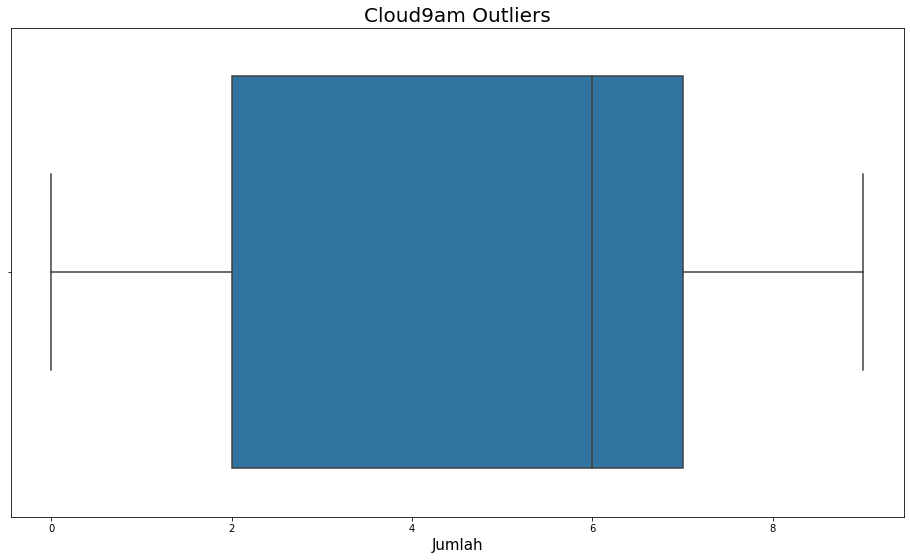

In [69]:
# Kita akan mengecek outlier pada kolom Cloud9am
ol = outliers()
print(ol.limit('Cloud9am'))
print('-'*50)
print(ol.percent_outliers('Cloud9am'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['Cloud9am'])
plt.title('Cloud9am Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

Tidak ada outliers dalam kolom ini, jadi kita biarkan saja.

Lower Limit: -5.5
Lower Limit Extreme: -13.0
Upper Limit: 14.5
Upper Limit Extreme: 22.0
None
--------------------------------------------------
Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None


Text(0.5, 0, 'Jumlah')

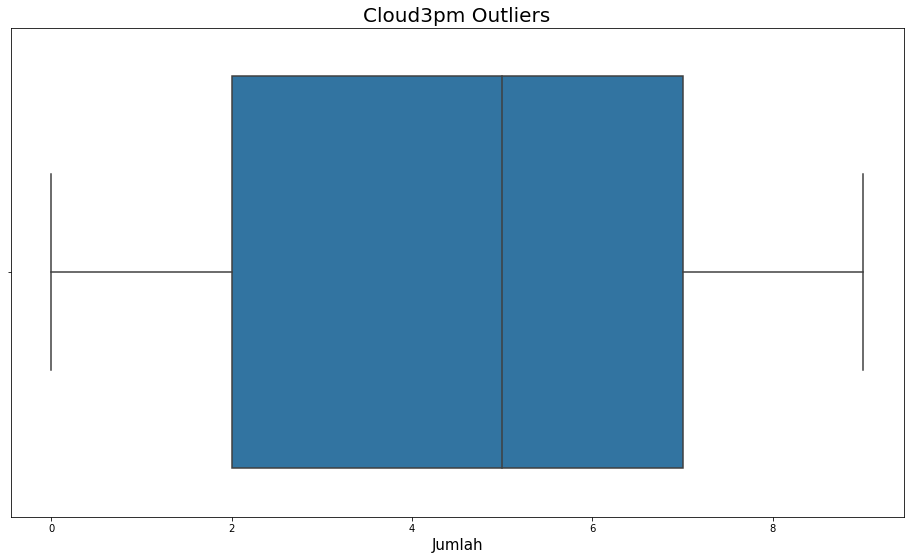

In [70]:
# Kita akan mengecek outlier pada kolom Cloud3pm
ol = outliers()
print(ol.limit('Cloud3pm'))
print('-'*50)
print(ol.percent_outliers('Cloud3pm'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['Cloud3pm'])
plt.title('Cloud3pm Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

Tidak ada outliers dalam kolom ini, jadi kita biarkan saja.

Lower Limit: -1.349999999999996
Lower Limit Extreme: -14.999999999999993
Upper Limit: 35.05
Upper Limit Extreme: 48.69999999999999
None
--------------------------------------------------
Lower Limit: 0.032803142998817564 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.019071594766754397 %
Upper Limit Extereme: 0.0 %
None


Text(0.5, 0, 'Jumlah')

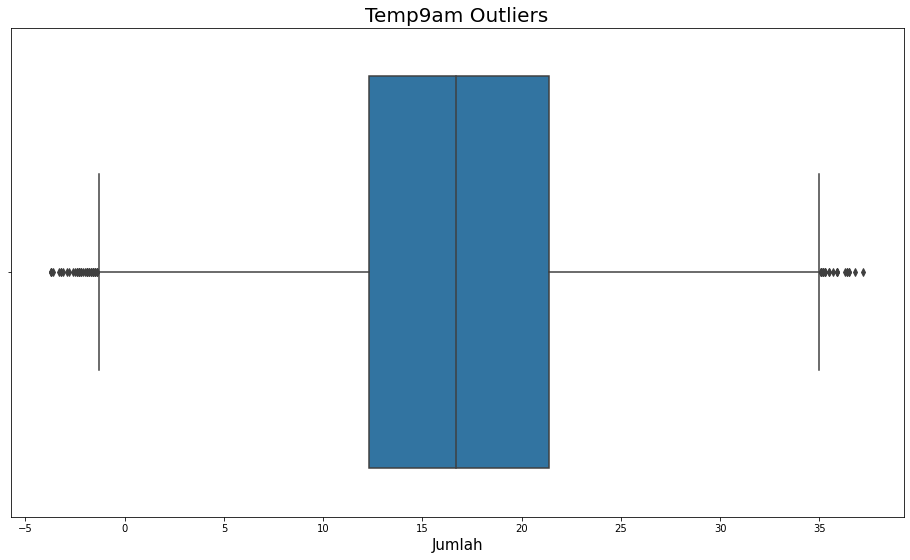

In [71]:
# Kita akan mengecek outlier pada kolom Temp9am
ol = outliers()
print(ol.limit('Temp9am'))
print('-'*50)
print(ol.percent_outliers('Temp9am'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['Temp9am'])
plt.title('Temp9am Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

In [72]:
# Karena kurang dari 1 persen outliers maka saya akan drop saja
data.drop(data[(data['Temp9am'] < ol.lower_limit)].index, inplace=True)
data.drop(data[(data['Temp9am'] >= ol.upper_limit)].index, inplace=True)
print(ol.percent_outliers('Temp9am'))
print('Skewness of this column :', data['Temp9am'].skew())

Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None
Skewness of this column : 0.09049654219739488


Lower Limit: 2.9499999999999975
Lower Limit Extreme: -11.000000000000004
Upper Limit: 40.15
Upper Limit Extreme: 54.1
None
--------------------------------------------------
Lower Limit: 0.09693398566598228 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.17783951700924308 %
Upper Limit Extereme: 0.0 %
None


Text(0.5, 0, 'Jumlah')

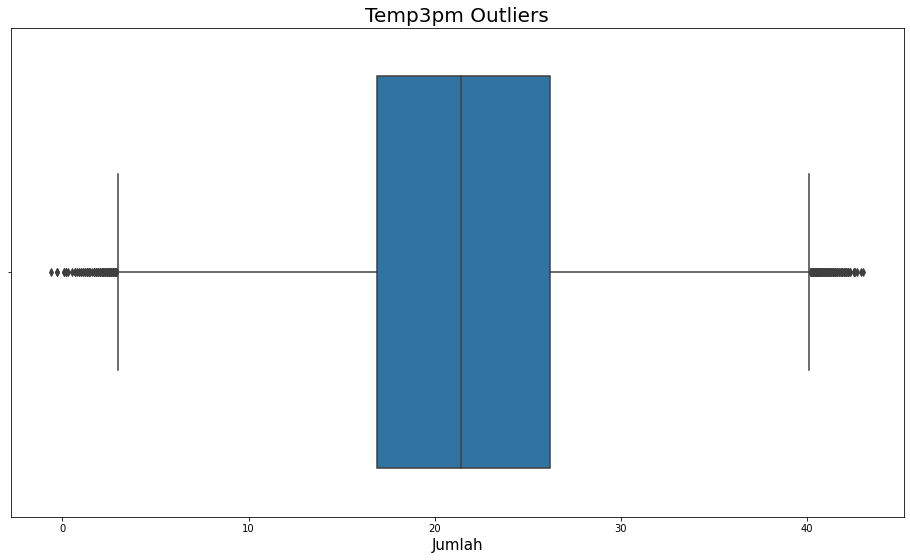

In [73]:
# Kita akan mengecek outlier pada kolom Temp3pm
ol = outliers()
print(ol.limit('Temp3pm'))
print('-'*50)
print(ol.percent_outliers('Temp3pm'))
#Mengecek grafik boxplot agar lebih jelas insight outliers nya
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=data['Temp3pm'])
plt.title('Temp3pm Outliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

In [74]:
# Karena kurang dari 1 persen outliers maka saya akan drop saja
data.drop(data[(data['Temp3pm'] < ol.lower_limit)].index, inplace=True)
data.drop(data[(data['Temp3pm'] > ol.upper_limit)].index, inplace=True)
print(ol.percent_outliers('Temp3pm'))
print('Skewness of this column :', data['Temp3pm'].skew())

Lower Limit: 0.0 %
Lower Limit Extereme: 0.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None
Skewness of this column : 0.2491360865366535


Untuk kolom Rainfall, Evaporation, dan Sunshine tidak kita lakukan handing karena pada kolom tersebut terdapat nilai 0 yang penting informasinya.
Sekarang data tiap kolom sudah bersih dari outliers dan skewness menunjukan bahwa rata - rata tiap kolom hamppir 0, yang artinya bagus karena semakin dekan ke distribusi normal (skewness = 0).

## 2.4 Feature Selection

Tahap ini kita akan memilih atau mencari feature mana saja yang paling relefan dengan target kita. Saya suda mencoba dengan menggunakan KBest dan Feature Importance dan saya juga tidak memnggunkan corelation coeficient karena target variabelnya dan ada beberapa independen variabel yang kategorikal. Namun setela dimasukkan ke dalam model yang paling bagus adalah Fetaure Importance.

In [75]:
# variabel - vairiabel yang tidak penting perlu dihapus agar tidak terjadi salah interpretasi
# variabel RISK_MM tidak penting karena hanya menunjukan persentasi berapa kali hujan dalam hari itu dimana sudah diganti dengan variabel RainToday
# variabel WindGustDir juga tidak penting karena menunjukan arah angin 
# variabel Location juga tidak penting karena menunjukan lokasi penelitian dimana bukan target dari model kita
#  Variabel Date, Year, Month juga tidak penting karena digunakan hanya untuk eksplorasi data
# Variabel RainToday juga kita drop saja, karena akan diganti dengan variabel target RainTomorrow

data = data.drop(columns=['Date', 'Location','RISK_MM','WindGustDir','WindDir9am','WindDir3pm','RainToday','Year', 'Month'])


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


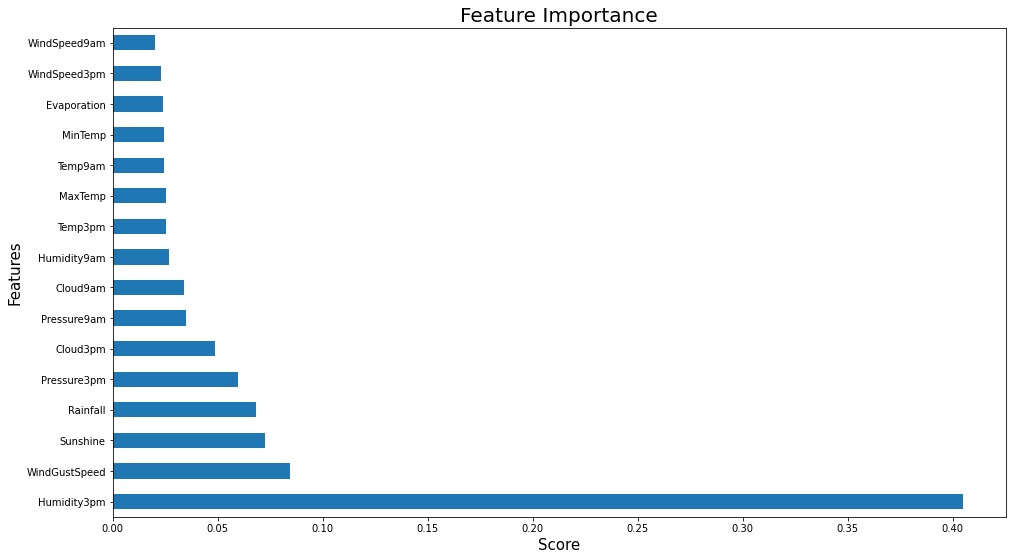

In [76]:
#karena data memiliki jumlah input yang sangat banyak, maka saya akan menggunakan teknik feature importance pada fetaure selection
#kita akan memisahkan dulu independen dan dependen featurenya
data = data.reset_index(drop=True) 
y = data['RainTomorrow']
x = data.drop(columns=['RainTomorrow'], axis=1)

#kita coba menggunakan fetaure importance pada model XGboost
model = XGBClassifier()
model.fit(x,y)

#Kita visualisasi feature yang penting-penting
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
f, ax = plt.subplots(figsize=(16,9))
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance', fontsize=20)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.show()

Kita akan menggunakan 10 kolom dengan feature importance tertinggi, yaitu Humidity3pm, WindGustSpeed, Sunshine, Rainfall, Pressure3pm, Cloud3pm, Pressure9am, Cloud9am, Humidity9am, dan MinTemp.

In [77]:
data = data[['Humidity3pm', 'WindGustSpeed', 'Sunshine', 'Rainfall', 'Pressure3pm', 'Cloud3pm', 'Pressure9am',
             'Cloud9am', 'Humidity9am', 'MinTemp', 'RainTomorrow']]
data.shape

(130657, 11)

## 2.5 Imbalance Dataset

Karena ini adalah problem klasifikasi dan target variabel pada dataset ini memiliki perbandingan yang sangat jauh kerena persentase yang Hujan pasti lebih sedikit dibandingkan dengan yang Tidak Hujan apabila melihat dari iklim Australia, sehingga kita perlu menangani hal ini agar ketika nanti masuk ke dalam model tidak teraji bias karena terjadinya perbedaan ratio pada target variabel.

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

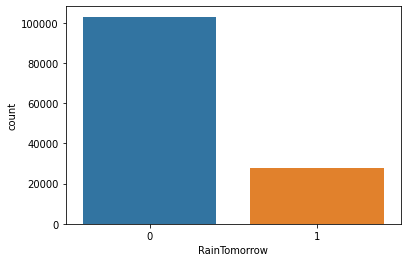

In [78]:
#Visualisasi Imbalance Dataset Sebelum Di-handling
sns.countplot("RainTomorrow",data=data)

In [79]:
#Kita cek ratio target variabel
print(data.RainTomorrow.value_counts())
print('-'*50)
print('Rain Tomorrow (0): {} %'.format(data[(data['RainTomorrow'] == 0)].shape[0]/data.shape[0]*100))
print('Rain Tomorrow (1): {} %'.format(data[(data['RainTomorrow'] == 1)].shape[0]/data.shape[0]*100))

0    103071
1     27586
Name: RainTomorrow, dtype: int64
--------------------------------------------------
Rain Tomorrow (0): 78.88670335305417 %
Rain Tomorrow (1): 21.11329664694582 %


Dapat dilihat bahwa perbandingan ratio antara 0 dan 1 sangat jauh yaitu, 79,1 % dan 20.9 %. oleh karena itu perlu dilakukan handling imbalance dataset.

In [80]:
#pertama kita akan membagi data menjadi train dan test, namun perlu diingat, jika target data kita imbalance
#sehingga kita membagi data di train dan testnya harus sesuai, jadi tidak boleh dalam pembagian datanya ada yang 
#hanya berisi 0 atau yang mayoritas aja, makanya kita menggunakan stratify=y
y = data['RainTomorrow']
x = data.drop(columns=['RainTomorrow'], axis=1)
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=27, stratify=y)

In [81]:
#saya akan mengggunakan SMOTE dan kemudian di undersampling lagi agar dataset balance
over = SMOTE(sampling_strategy='minority')
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

#sekarang kita fit ke training data kita
x_train, y_train = pipeline.fit_resample(x_train, y_train)

In [82]:
y_train.value_counts()

1    77303
0    77303
Name: RainTomorrow, dtype: int64

bisa dilihat bahwa nilai 0 dan 1 pada y_train memiliki ratio yang sama (50:50).

# 3. Modelling

Setelah semua data sudah bersih dan siap dimasukkan ke dalam model, maka ini saatnya kita membuat model dan mencari model yang paling optimal. Agar memudahkan melihat model mana yang paling optimal, saya akan langsung evaluasi setela membuat model, dilatih dan dites.

In [83]:
#Membuat fungsi yang nanti sekalin bisa training dan tes kemudian dievaluasi
def model_eval(algo,x_train,y_train,x_test,y_test):
    # Train data
    algo.fit(x_train,y_train)
    y_train_pred = algo.predict(x_train)
    y_train_prob = algo.predict_proba(x_train)[:,-1]

    #Test data

    y_test_pred = algo.predict(x_test)
    y_test_prob = algo.predict_proba(x_test)[:,-1]
    y_probas = algo.predict_proba(x_test)
    
    #Confussion Matrix
    plot_confusion_matrix(algo, x_test, y_test)
    plt.show() 
    print('='*100)
    print('Classification Report: \n', classification_report(y_test, y_test_pred, digits=3))
    print('='*100)
    
    #ROC Curve
    fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
    skplt.metrics.plot_roc(y_test, y_probas)
    
    #PR Curve
    skplt.metrics.plot_precision_recall(y_test, y_probas)
    plt.show()

## 3.1 Logistic Regression

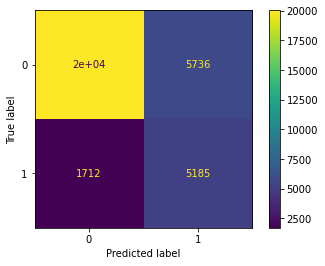

Classification Report: 
               precision    recall  f1-score   support

           0      0.921     0.777     0.843     25768
           1      0.475     0.752     0.582      6897

    accuracy                          0.772     32665
   macro avg      0.698     0.765     0.713     32665
weighted avg      0.827     0.772     0.788     32665



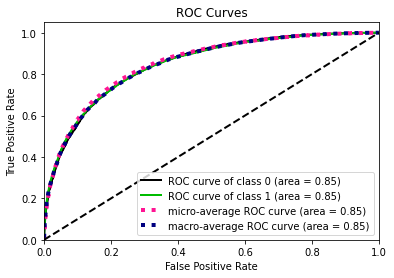

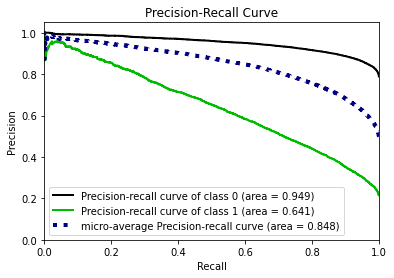

In [84]:
#Using Logistic Regression
lr = LogisticRegression()
model_eval(lr,x_train,y_train,x_test,y_test)

## 3.2 Naive Bayes

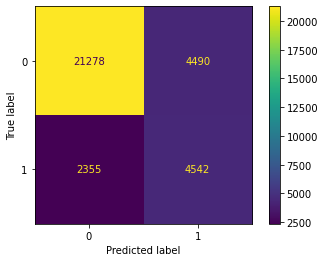

Classification Report: 
               precision    recall  f1-score   support

           0      0.900     0.826     0.861     25768
           1      0.503     0.659     0.570      6897

    accuracy                          0.790     32665
   macro avg      0.702     0.742     0.716     32665
weighted avg      0.816     0.790     0.800     32665



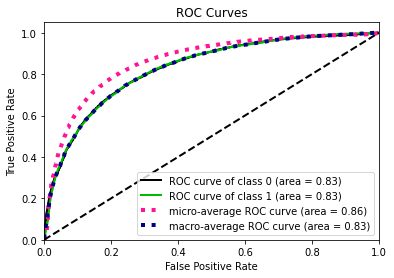

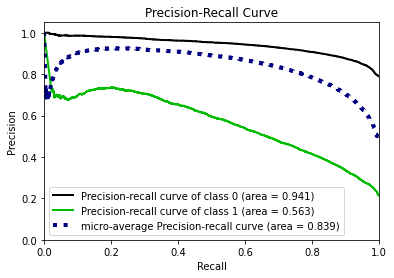

In [85]:
#sekarang kita coba menggunakan Naive Bayes
nb = GaussianNB()
model_eval(nb,x_train,y_train,x_test,y_test)

## 3.3 KNearest Neighbors

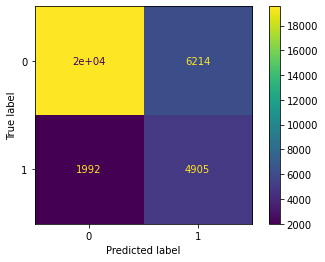

Classification Report: 
               precision    recall  f1-score   support

           0      0.908     0.759     0.827     25768
           1      0.441     0.711     0.545      6897

    accuracy                          0.749     32665
   macro avg      0.674     0.735     0.686     32665
weighted avg      0.809     0.749     0.767     32665



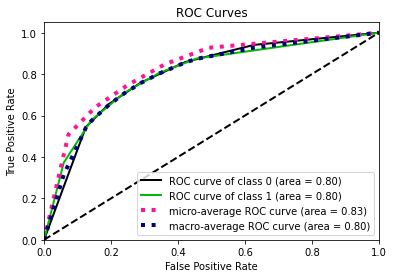

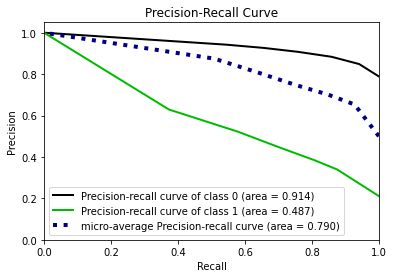

In [86]:
#Sekarang kita coba menggunakan KNN
knn = KNeighborsClassifier()
model_eval(knn,x_train,y_train,x_test,y_test)

## 3.4 Random Forrest Classifier

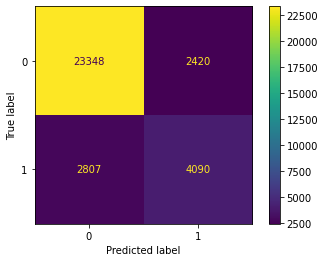

Classification Report: 
               precision    recall  f1-score   support

           0      0.893     0.906     0.899     25768
           1      0.628     0.593     0.610      6897

    accuracy                          0.840     32665
   macro avg      0.760     0.750     0.755     32665
weighted avg      0.837     0.840     0.838     32665



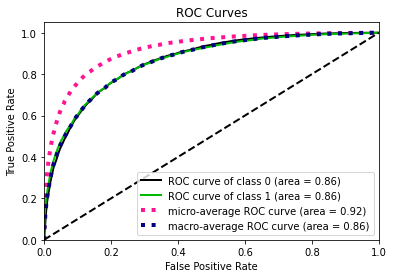

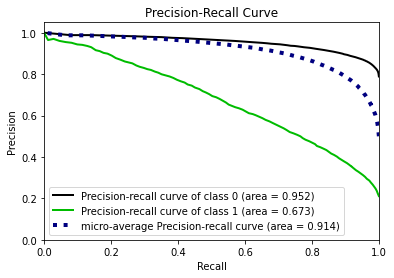

In [87]:
#Sekarang kita coba Random Forest
rf = RandomForestClassifier()
model_eval(rf,x_train,y_train,x_test,y_test)

## 3.5 XGB Classifier

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:48:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


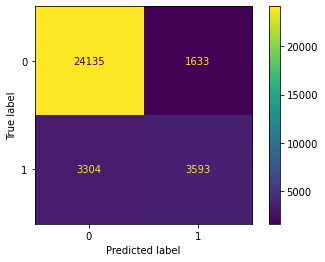

Classification Report: 
               precision    recall  f1-score   support

           0      0.880     0.937     0.907     25768
           1      0.688     0.521     0.593      6897

    accuracy                          0.849     32665
   macro avg      0.784     0.729     0.750     32665
weighted avg      0.839     0.849     0.841     32665



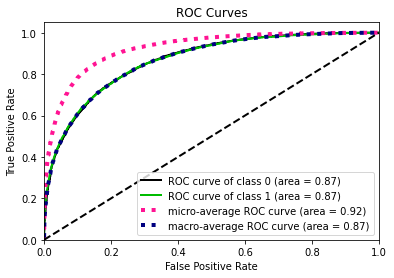

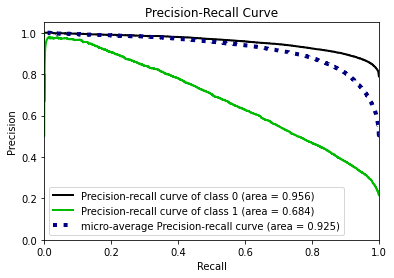

In [88]:
#Sekarang kita coba menggunakan XGBoost
xgb = XGBClassifier()
model_eval(xgb,x_train,y_train,x_test,y_test)

Berdasarkan perbandingan model di atas dapat kita simpulkan bahwa XGBoost adalah moel yang terbaik karena memiliki nilai Precission dan Recall yang paling tinggi serta f-1 score yang cukup tinggi. namun bisa kita lihat performa Precission dan Recallnya cukup jauh perbandingannya, maka saya meggunakan scoringnya F-1 Score agar keduanya cukup optimal

# 4. Model Tuning

kita akan membuat function opmitasi model dengan menggunakan GridSearchCV

In [ ]:
# Menentukan Parameter
parameters ={"learning_rate" : [0.1, 0.01, 0.001] ,
            "max_depth" : [ 2, 4, 7, 10],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma" : [ 0.01, 0.1, 0.3,0.5,1,1.5,2 ],
            "colsample_bytree" : [ 0.3, 0.6, 0.8, 1.0],}
# Membuat fungsi untuk model tuning
def model_tune(clf, parameters, x_train, y_train):
    # membuat GridSearchCV Object
    search = GridSearchCV(estimator=clf,
                        param_grid=parameters,
                        scoring = 'f1',
                        n_jobs = -1,
                        cv = 3,
                        verbose=True)

    # Fit the model
    xgb_gscv = search.fit(x_train, y_train)

    # Model best estimators
    print('Learning Rate :', model_xgboost.best_estimator_.get_params()['learning_rate'])
    print('Max Depth :', model_xgboost.best_estimator_.get_params()['max_depth'])
    print('Min Child Weight :', model_xgboost.best_estimator_.get_params()['min_child_weight'])
    print('gamma :', model_xgboost.best_estimator_.get_params()['gamma'])
    print('Col Sample Bytree :', model_xgboost.best_estimator_.get_params()['colsample_bytree'])

# tune model     
# model_tune(xgb, parameters, x_train, y_train)

saya sudah mencoba tuning, didapatkan parameter terbaik adalah :
1. Learning rate : 0.1
2. max Depth : 7
3. Min Child Weight : 1
4. Gamma : 0
5. Colsample_bytree : 0.6

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:49:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


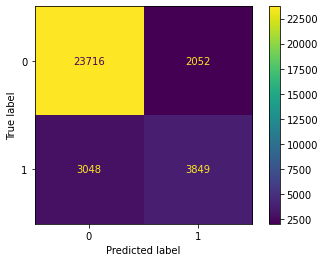

Classification Report: 
               precision    recall  f1-score   support

           0      0.886     0.920     0.903     25768
           1      0.652     0.558     0.602      6897

    accuracy                          0.844     32665
   macro avg      0.769     0.739     0.752     32665
weighted avg      0.837     0.844     0.839     32665



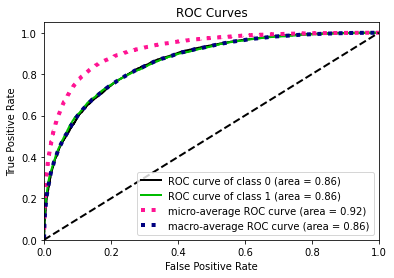

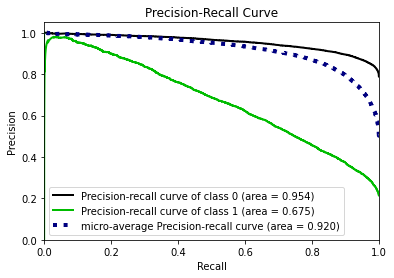

In [100]:
# Memasukan parameter pada model kita

xgb_tune = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=1, gamma=0.2,
                    learning_rate=0.2, max_delta_step=0, max_depth=5,
                    min_child_weight=1.5, missing=None, n_estimators=100, n_jobs=1,
                    nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=None, subsample=1, verbosity=1)
model_eval(xgb_tune, x_train, y_train, x_test, y_test)

Ada sedikit peningkatan pada F1 score untuk class 1 yang sebelumnya 59 % sekarang 60 %. Memang anatara Recall dan Precission akan teradi trade-off maka saya menggunakan scoring pada GridScearchCV adala F1-Score karena mencoba mengharmonikan keduanya. Perlu diingat kembali bahwa dataset ini imbalance atau tidak seimbang pada target variabelnya.

# 5. Deployment

In [101]:
import pickle
pickle.dump(xgb_tune, open('rain_forecast.pkl','wb'))

Setelah semua dirasa cukup dan optimal, sekarang waktunya untuk deployment dengan menggunakan Streamlit dan Heroku. Disini saya anya membuat aplikasi sederhana saja. Untuk melihat lebi detail terkait deployment, sila cek di file yang ada di repository atau untuk melihat hasilnya cek di link berikut:

# 6. Conclusion

Dari semua tahapan yang telah kita lewati, ada beberapa kesimpulan yang bisa daimbil dari project kali ini:

1. Model terbaik adalah XGBoost dengan Micro Average PR AUC 98.9%, Recall 85.1%, Precission 51% hasil paramter tunning sebagai berikut:
    - Learning rate : 0.1
    - max Depth : 7
    - Min Child Weight : 1
    - Gamma : 0
    - Colsample_bytree : 0.6
2. Variabel yang relefan atau berpengaruh terhadap target adalah:
    - Humidity3pm
    - WindGustSpeed
    - Sunshine
    - Rainfall
    - Pressure3pm
    - Cloud3pm
    - Pressure9am
    - Cloud9am
    - Humidity9am
    - MinTemo
3. Perlu adanya seoarang yang memeiliki backgroung ataupun domain expertise pada bidang meteorologi karena penentuan treshold pada model tunning sangat mempengaruhi prediksi
4. Dicoba tunning kembali dengan berbagai hyperparamter yang lain. 